In [449]:
import pandas as pd
from pandas.plotting import andrews_curves
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from typing import Literal


In [336]:
df = pd.read_csv('./data/lego_sets.csv')

In [4]:
class Regr(LinearRegression):
        def __init__(
        self,
        *,
        fit_intercept=True,
        copy_X=True,
        n_jobs=None,
        positive=False):
            
            self.fit_intercept = fit_intercept
            self.copy_X = copy_X
            self.n_jobs = n_jobs
            self.positive = positive
        
    
        def theme_fit(self, df: pd.DataFrame, col: str) -> pd.DataFrame:
            x = pd.DataFrame(df[df['theme_name'] == col]['list_price']) 
            y = pd.DataFrame(df[df['theme_name'] == col]['piece_count'])
            self.fit(x, y)
            return x

In [5]:
def Price_vs_Number_of_pieces(df: pd.DataFrame, themes: list | str, country: str = 'FI') -> any:
    tar = df[df['theme_name'].isin(themes) & df['country'].isin([country]) & (df['piece_count'] < 3000)]

    categories = np.unique(tar['theme_name'])
    colors = [plt.cm.tab10(i / float(len(categories))) for i in range(len(categories))]

    fig, ax = plt.subplots(figsize=(18, 10), dpi=250, facecolor='w', edgecolor='k')
    leg = []

    for i, theme in enumerate(categories):
        ax.scatter(x='list_price', y='piece_count',
                   data=tar.loc[tar.theme_name == theme, :],
                   s=20, c=colors[i], label=str(theme))
        m = Regr()
        x = m.theme_fit(tar, theme)
        ax.plot(x, m.predict(x), c=colors[i])

        leg.extend([theme, 'regression of ' + theme + ' sets'])

    ax.legend(leg)
    ax.set(xlabel='price', ylabel='a number of pieces')
    ax.set_title("Scatterplot of sets Price vs Number of pieces", fontsize=22)


<Axes: >

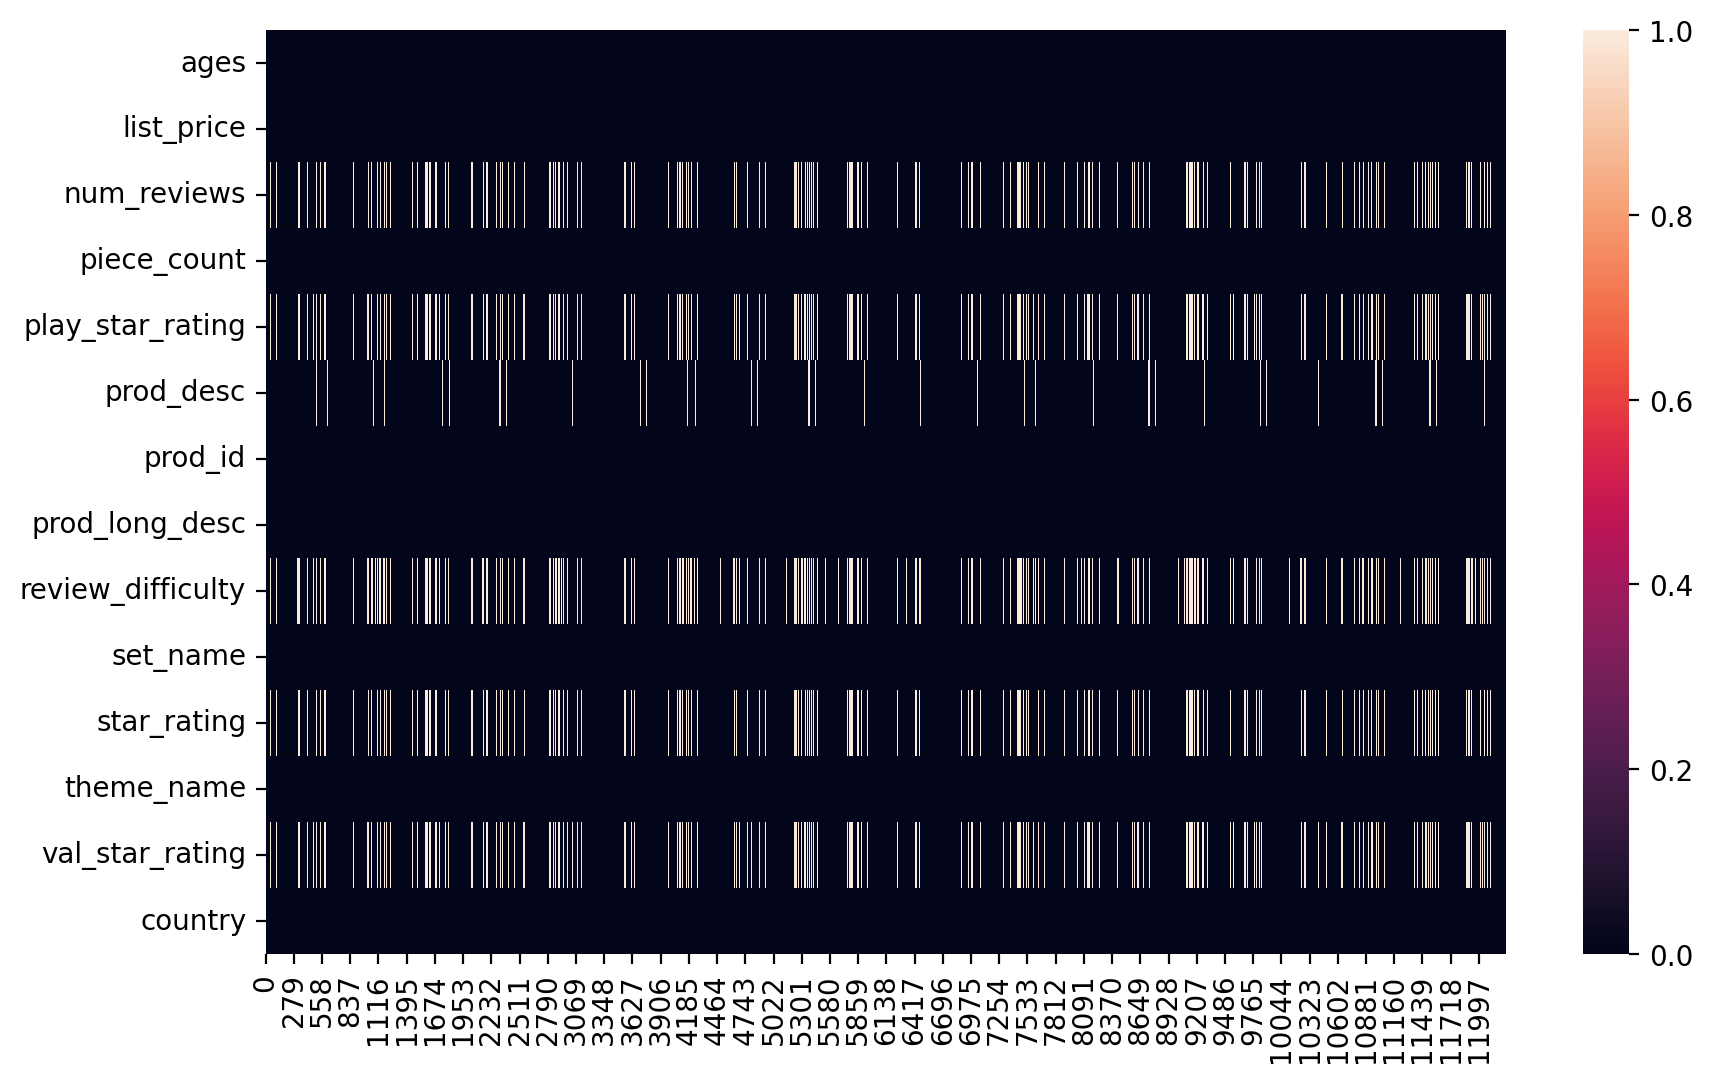

In [343]:
plt.figure(figsize=(10, 6), dpi=200)
sns.heatmap(df.isna().T)


In [342]:
df.iloc[8205] = df.iloc[8205].fillna('THE LEGO® BATMAN MOVIE')
df.iloc[3777] = df.iloc[3777].fillna('Speed Champions')
df.iloc[8087] = df.iloc[8087].fillna('Heartlake City Playground')

## NaN values filling

In [379]:
to_fill = df.isna().sum()[df.isna().sum().values > 0].index
to_fill

Index(['num_reviews', 'play_star_rating', 'prod_desc', 'review_difficulty',
       'star_rating', 'val_star_rating'],
      dtype='object')

<Axes: ylabel='Frequency'>

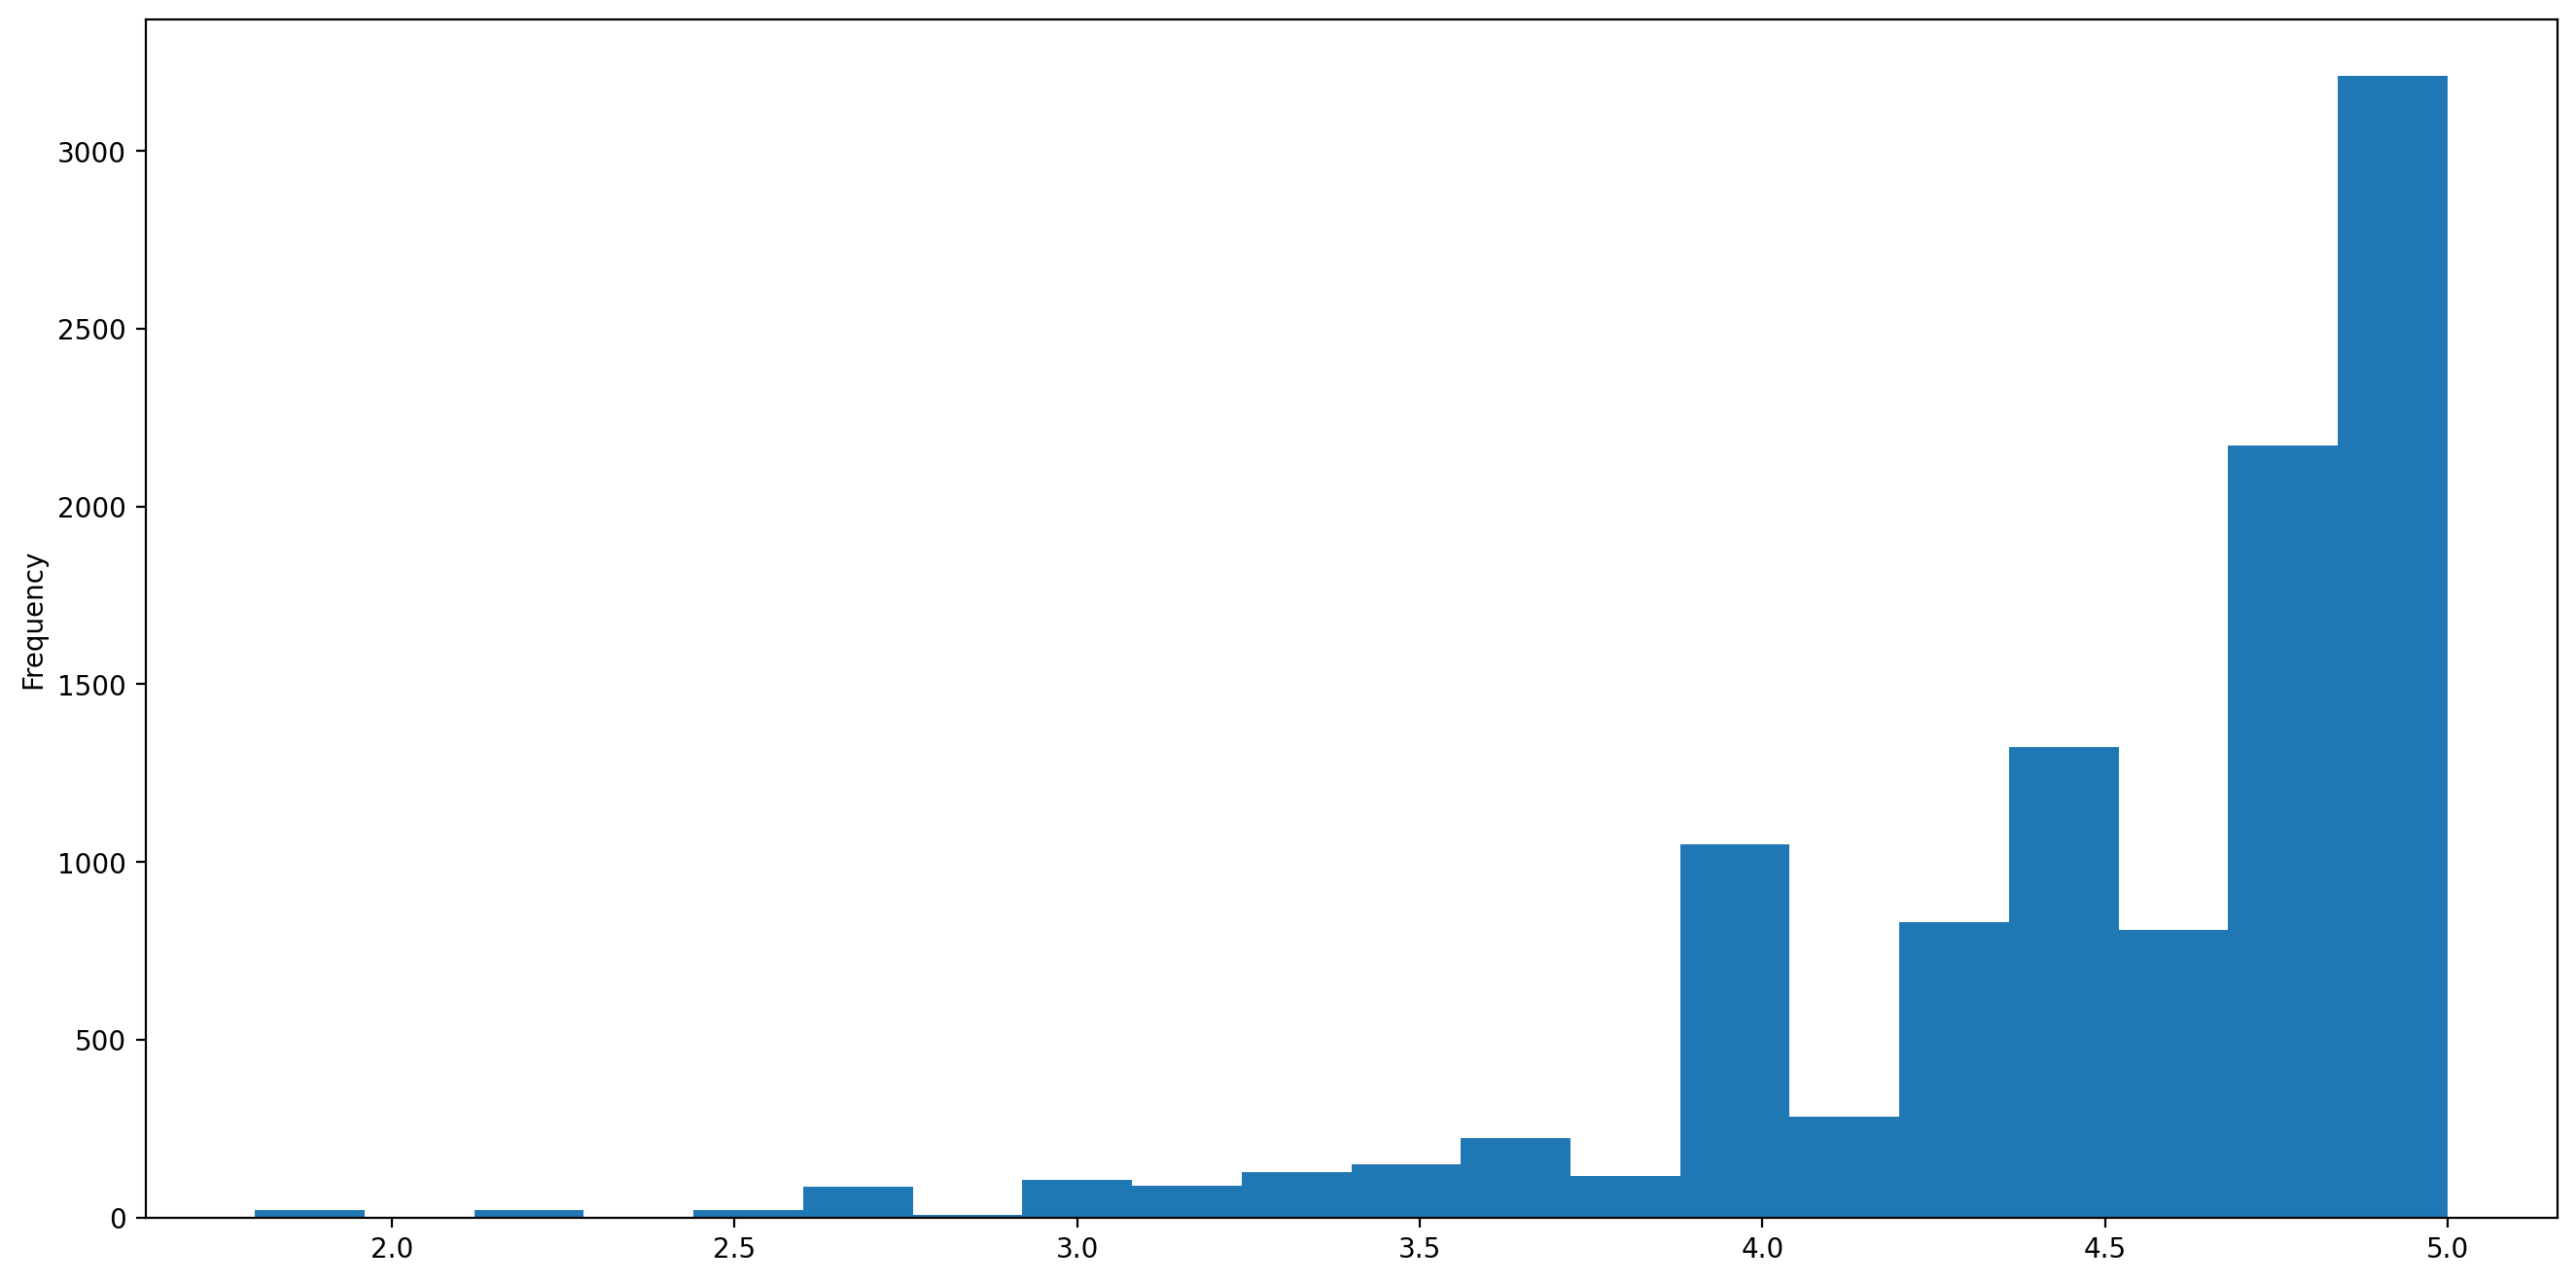

In [365]:
plt.figure(dpi=200, figsize=(16, 8))
df[to_fill[4]].plot(kind='hist', bins=20)

In [395]:
df = df.dropna(axis=1)

# Themes

/var/folders/_q/c23yl9bx1_9g4j_tnjxjf0hw0000gn/T/ipykernel_13664/3481323664.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df_bar.index, rotation=60, horizontalalignment= 'right')


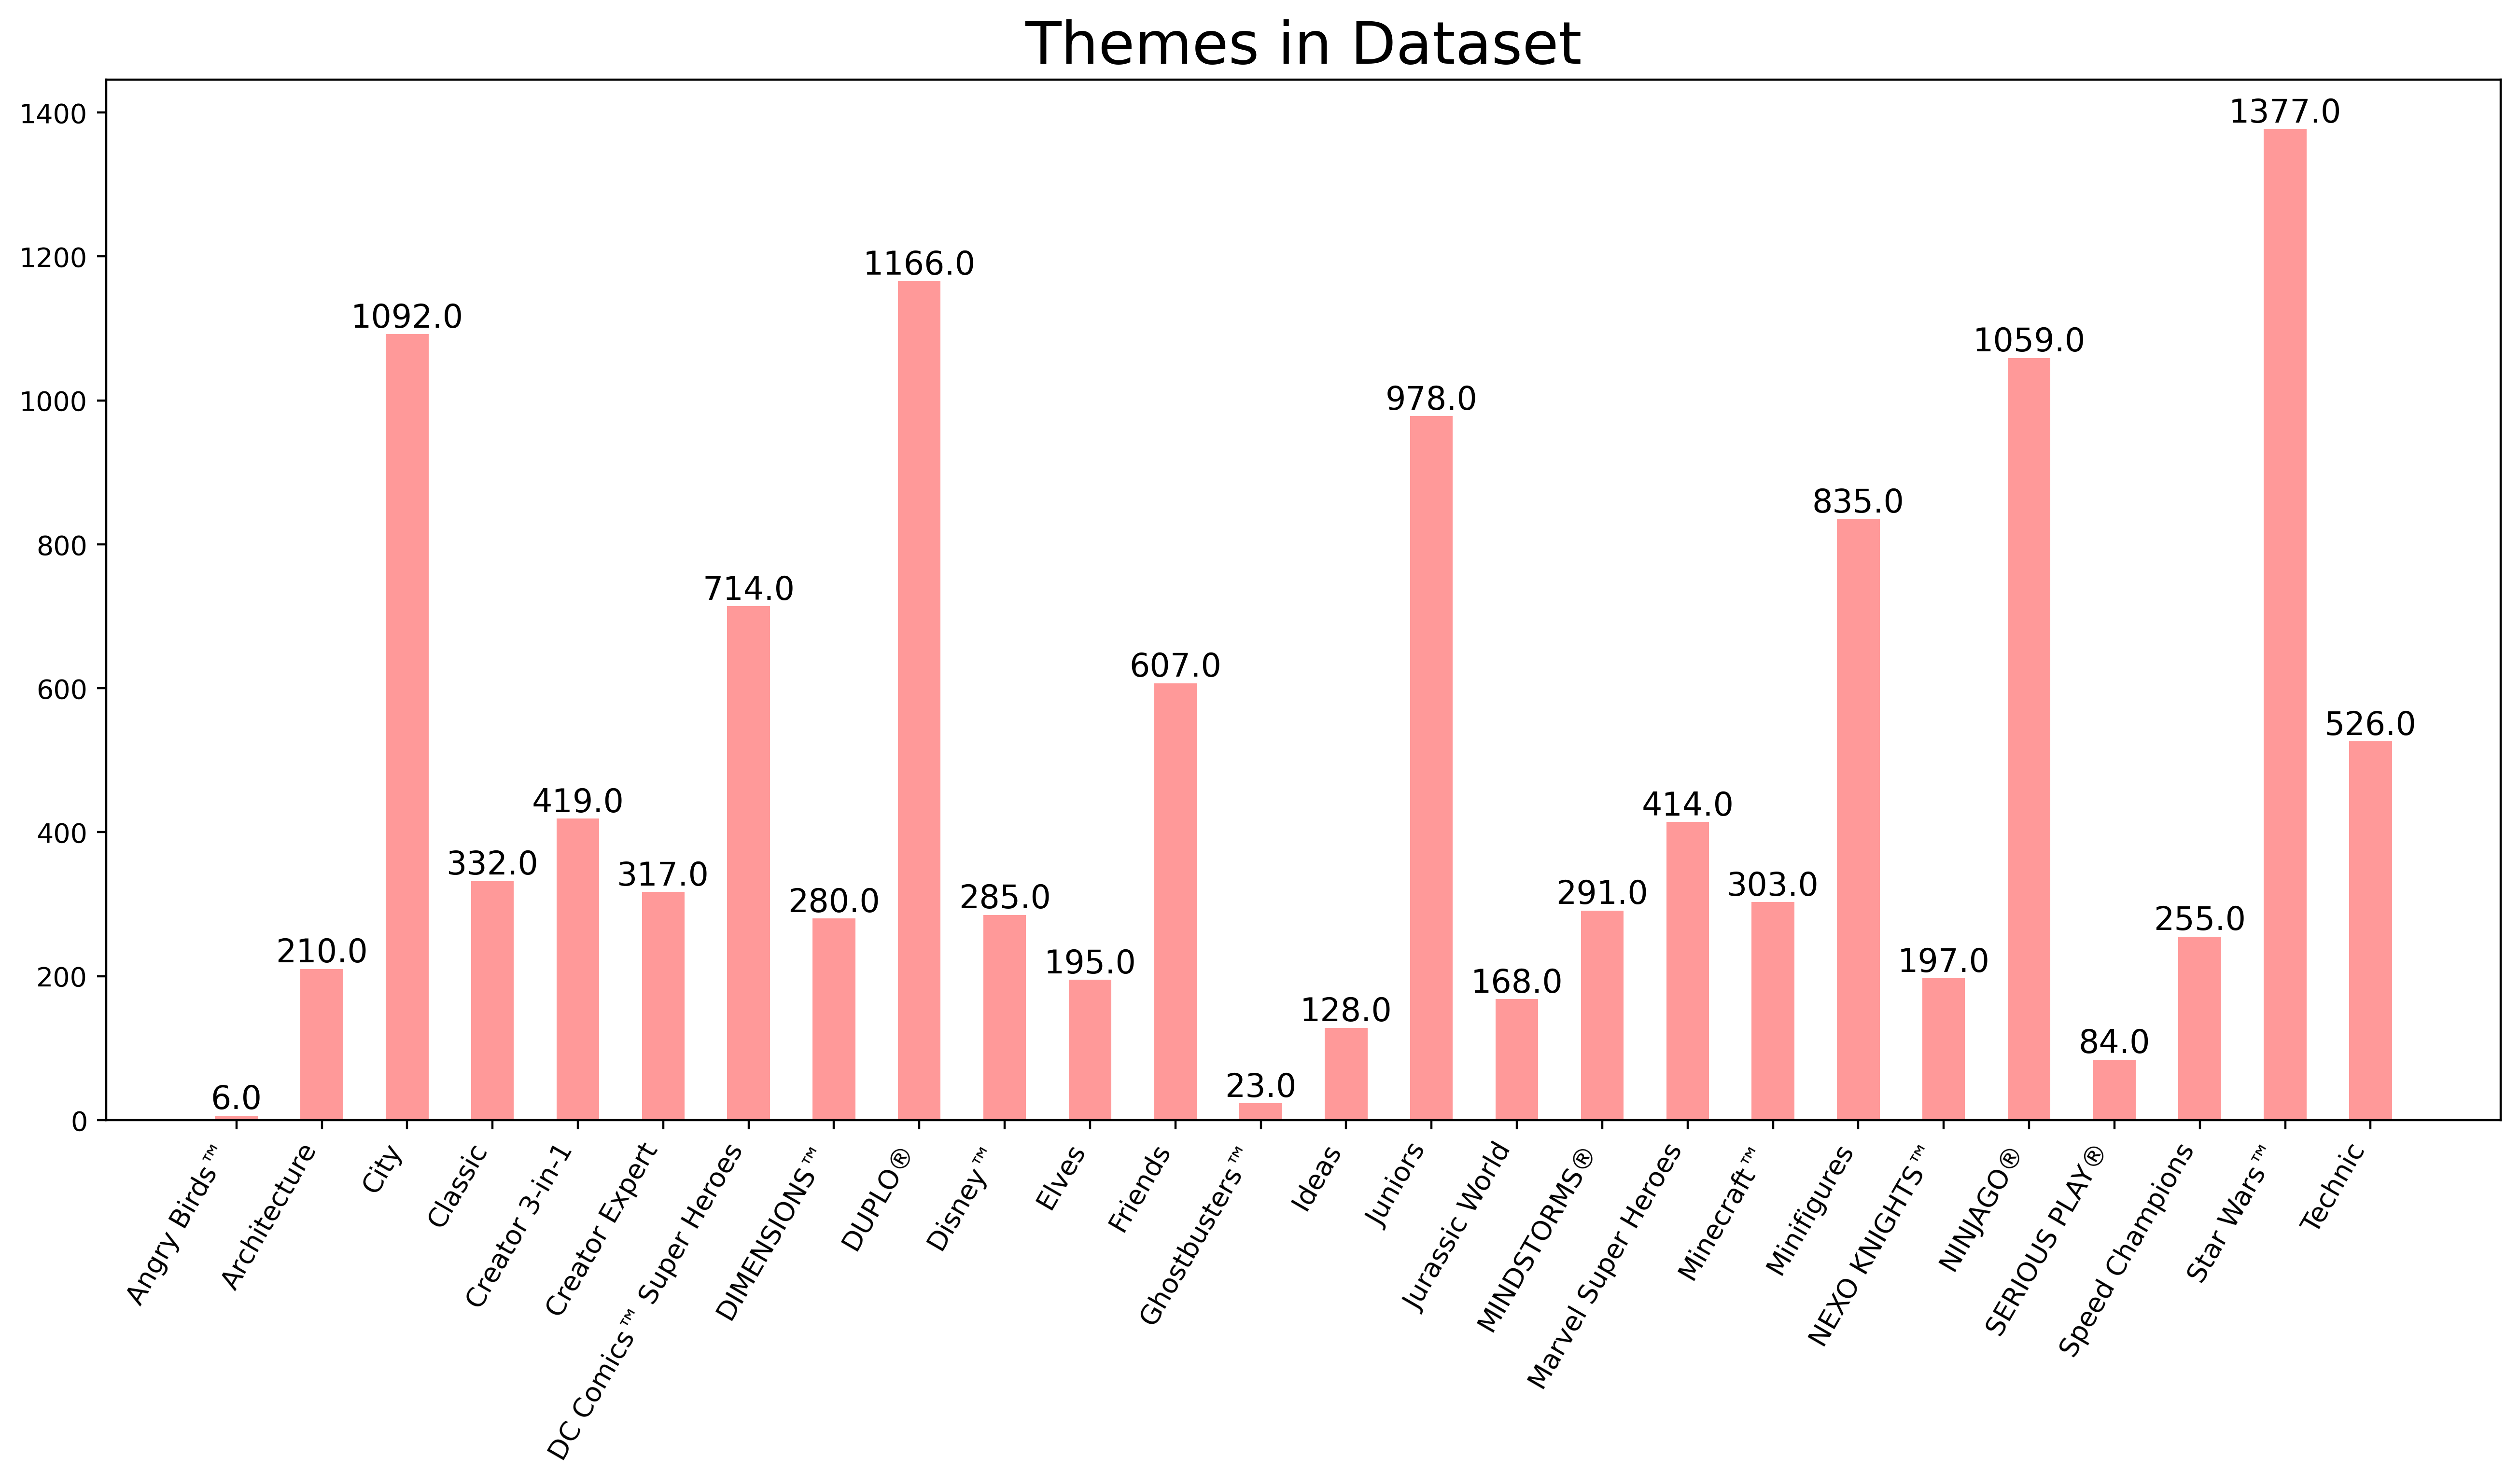

In [398]:
df_bar = df.groupby('theme_name').size()

plt.figure(figsize=(16,7), dpi= 400)
plt.bar(df_bar.index, df_bar.values, color='#ff9999', width=.5)

for i, val in enumerate(df_bar.values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
plt.gca().set_xticklabels(df_bar.index, rotation=60, horizontalalignment= 'right')

plt.title("Themes in Dataset", fontsize=22)

plt.show()

We can see thet "LEGO® BATMAN MOVIE" if also "DC", <br>
Lego "Power Functions" if also "Technic" and so on
 

In [397]:
Jur_w = ['Indoraptor Rampage at Lockwood Estate',
       'Carnotaurus Gyrosphere Escape', 'T. rex Transport',
       'Jurassic Park Velociraptor Chase', 'Dilophosaurus Outpost Attack',
       "Blue's Helicopter Pursuit", 'Stygimoloch Breakout',
       'Pteranodon Chase']
for theme in Jur_w:
    df['theme_name'] = df['theme_name'].replace(theme, 'Jurassic World')

df['theme_name'] = df['theme_name'].replace('THE LEGO® NINJAGO® MOVIE™', 'NINJAGO®')
df['theme_name'] = df['theme_name'].replace('DC Super Hero Girls', 'DC Comics™ Super Heroes')
df['theme_name'] = df['theme_name'].replace('THE LEGO® BATMAN MOVIE', 'DC Comics™ Super Heroes')
df['theme_name'] = df['theme_name'].replace('BOOST', 'MINDSTORMS®')
df['theme_name'] = df['theme_name'].replace('BrickHeadz', 'Minifigures')
df['theme_name'] = df['theme_name'].replace('LEGO® Creator 3-in-1', 'Creator 3-in-1')
df['theme_name'] = df['theme_name'].replace('Heartlake City Playground', 'Friends')
df['theme_name'] = df['theme_name'].replace('Power Functions', 'Technic')


/var/folders/_q/c23yl9bx1_9g4j_tnjxjf0hw0000gn/T/ipykernel_13664/140341888.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['theme_name'] = df['theme_name'].replace(theme, 'Jurassic World')
/var/folders/_q/c23yl9bx1_9g4j_tnjxjf0hw0000gn/T/ipykernel_13664/140341888.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['theme_name'] = df['theme_name'].replace('THE LEGO® NINJAGO® MOVIE™', 'NINJAGO®')
/var/folders/_q/c23yl9bx1_9g4j_tnjxjf0hw0000gn/T/ipykernel_13664/140341888.py:10: SettingWithCopyWarning

In [ ]:
def Lol(df: pd.DataFrame, col: str, mode: Literal['max', 'min', 'mean']) -> any:
    if mode == 'max':
        new_df = df.groupby('theme_name')[col].max().reset_index()
    elif mode == 'min':
        new_df = df.groupby('theme_name')[col].min().reset_index()
    elif mode == 'mean':
        new_df = df.groupby('theme_name')[col].mean().reset_index()
    else:
        raise ValueError(f'mode hasn`t got attribute {mode}')
    
    fig, ax = plt.subplots(figsize=(16,7), dpi=200)
    a = new_df[col].mean() / 20
    ax.vlines(x=new_df.theme_name, ymin=0, ymax=new_df[col], color='#009933', alpha=0.7, linewidth=2)
    ax.scatter(x=new_df.theme_name, y=new_df[col], s=75, color='#009933')
    
    if col == 'list_price':
        ax.set_ylabel('Price in $')
        ax.set_title(f'Lollipop {mode} prices in themes', fontdict={'size':22})
    elif col == 'piece_count':
        ax.set_ylabel('pieces')
        ax.set_title(f'Lollipop {mode} pieces in themes', fontdict={'size':22})
        
    ax.set_xticks(new_df.theme_name)
    ax.set_xticklabels(new_df.theme_name, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})

    for row in new_df.itertuples():
        ax.text(row.Index, new_df.loc[row.Index][col]+a, s=round(new_df.loc[row.Index][col]), horizontalalignment='center', verticalalignment='bottom', fontsize=14)

    plt.show()

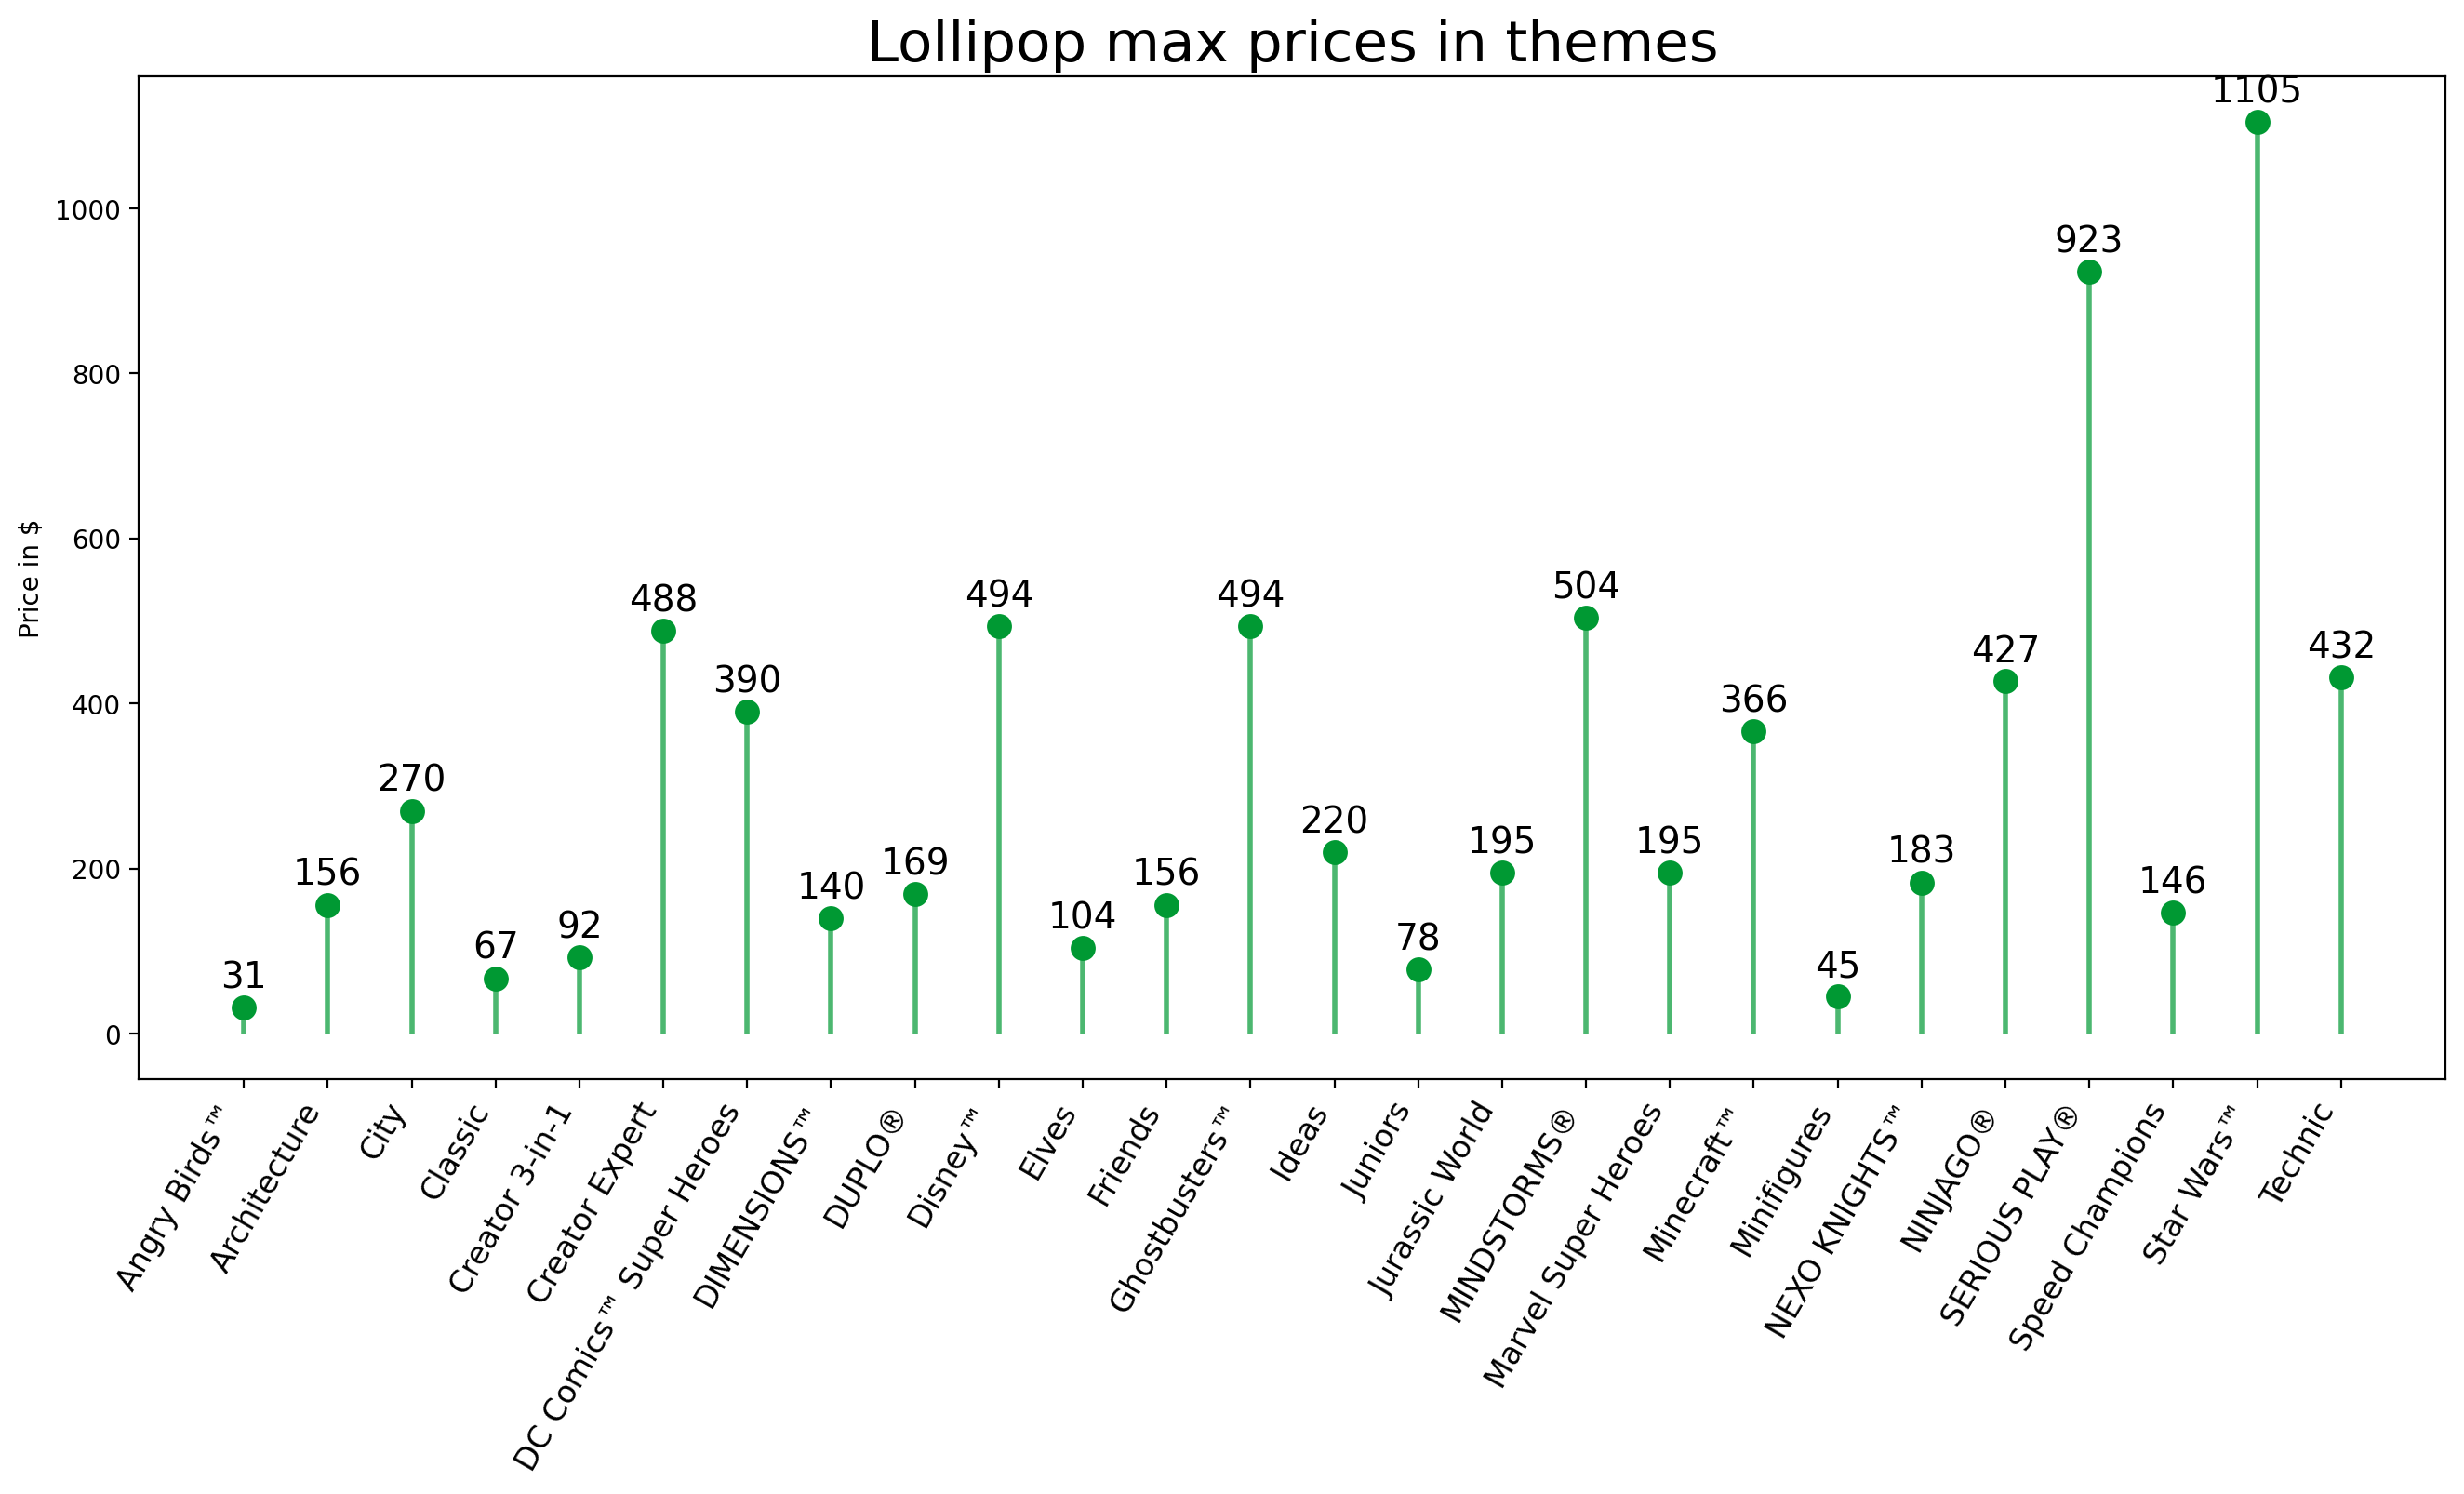

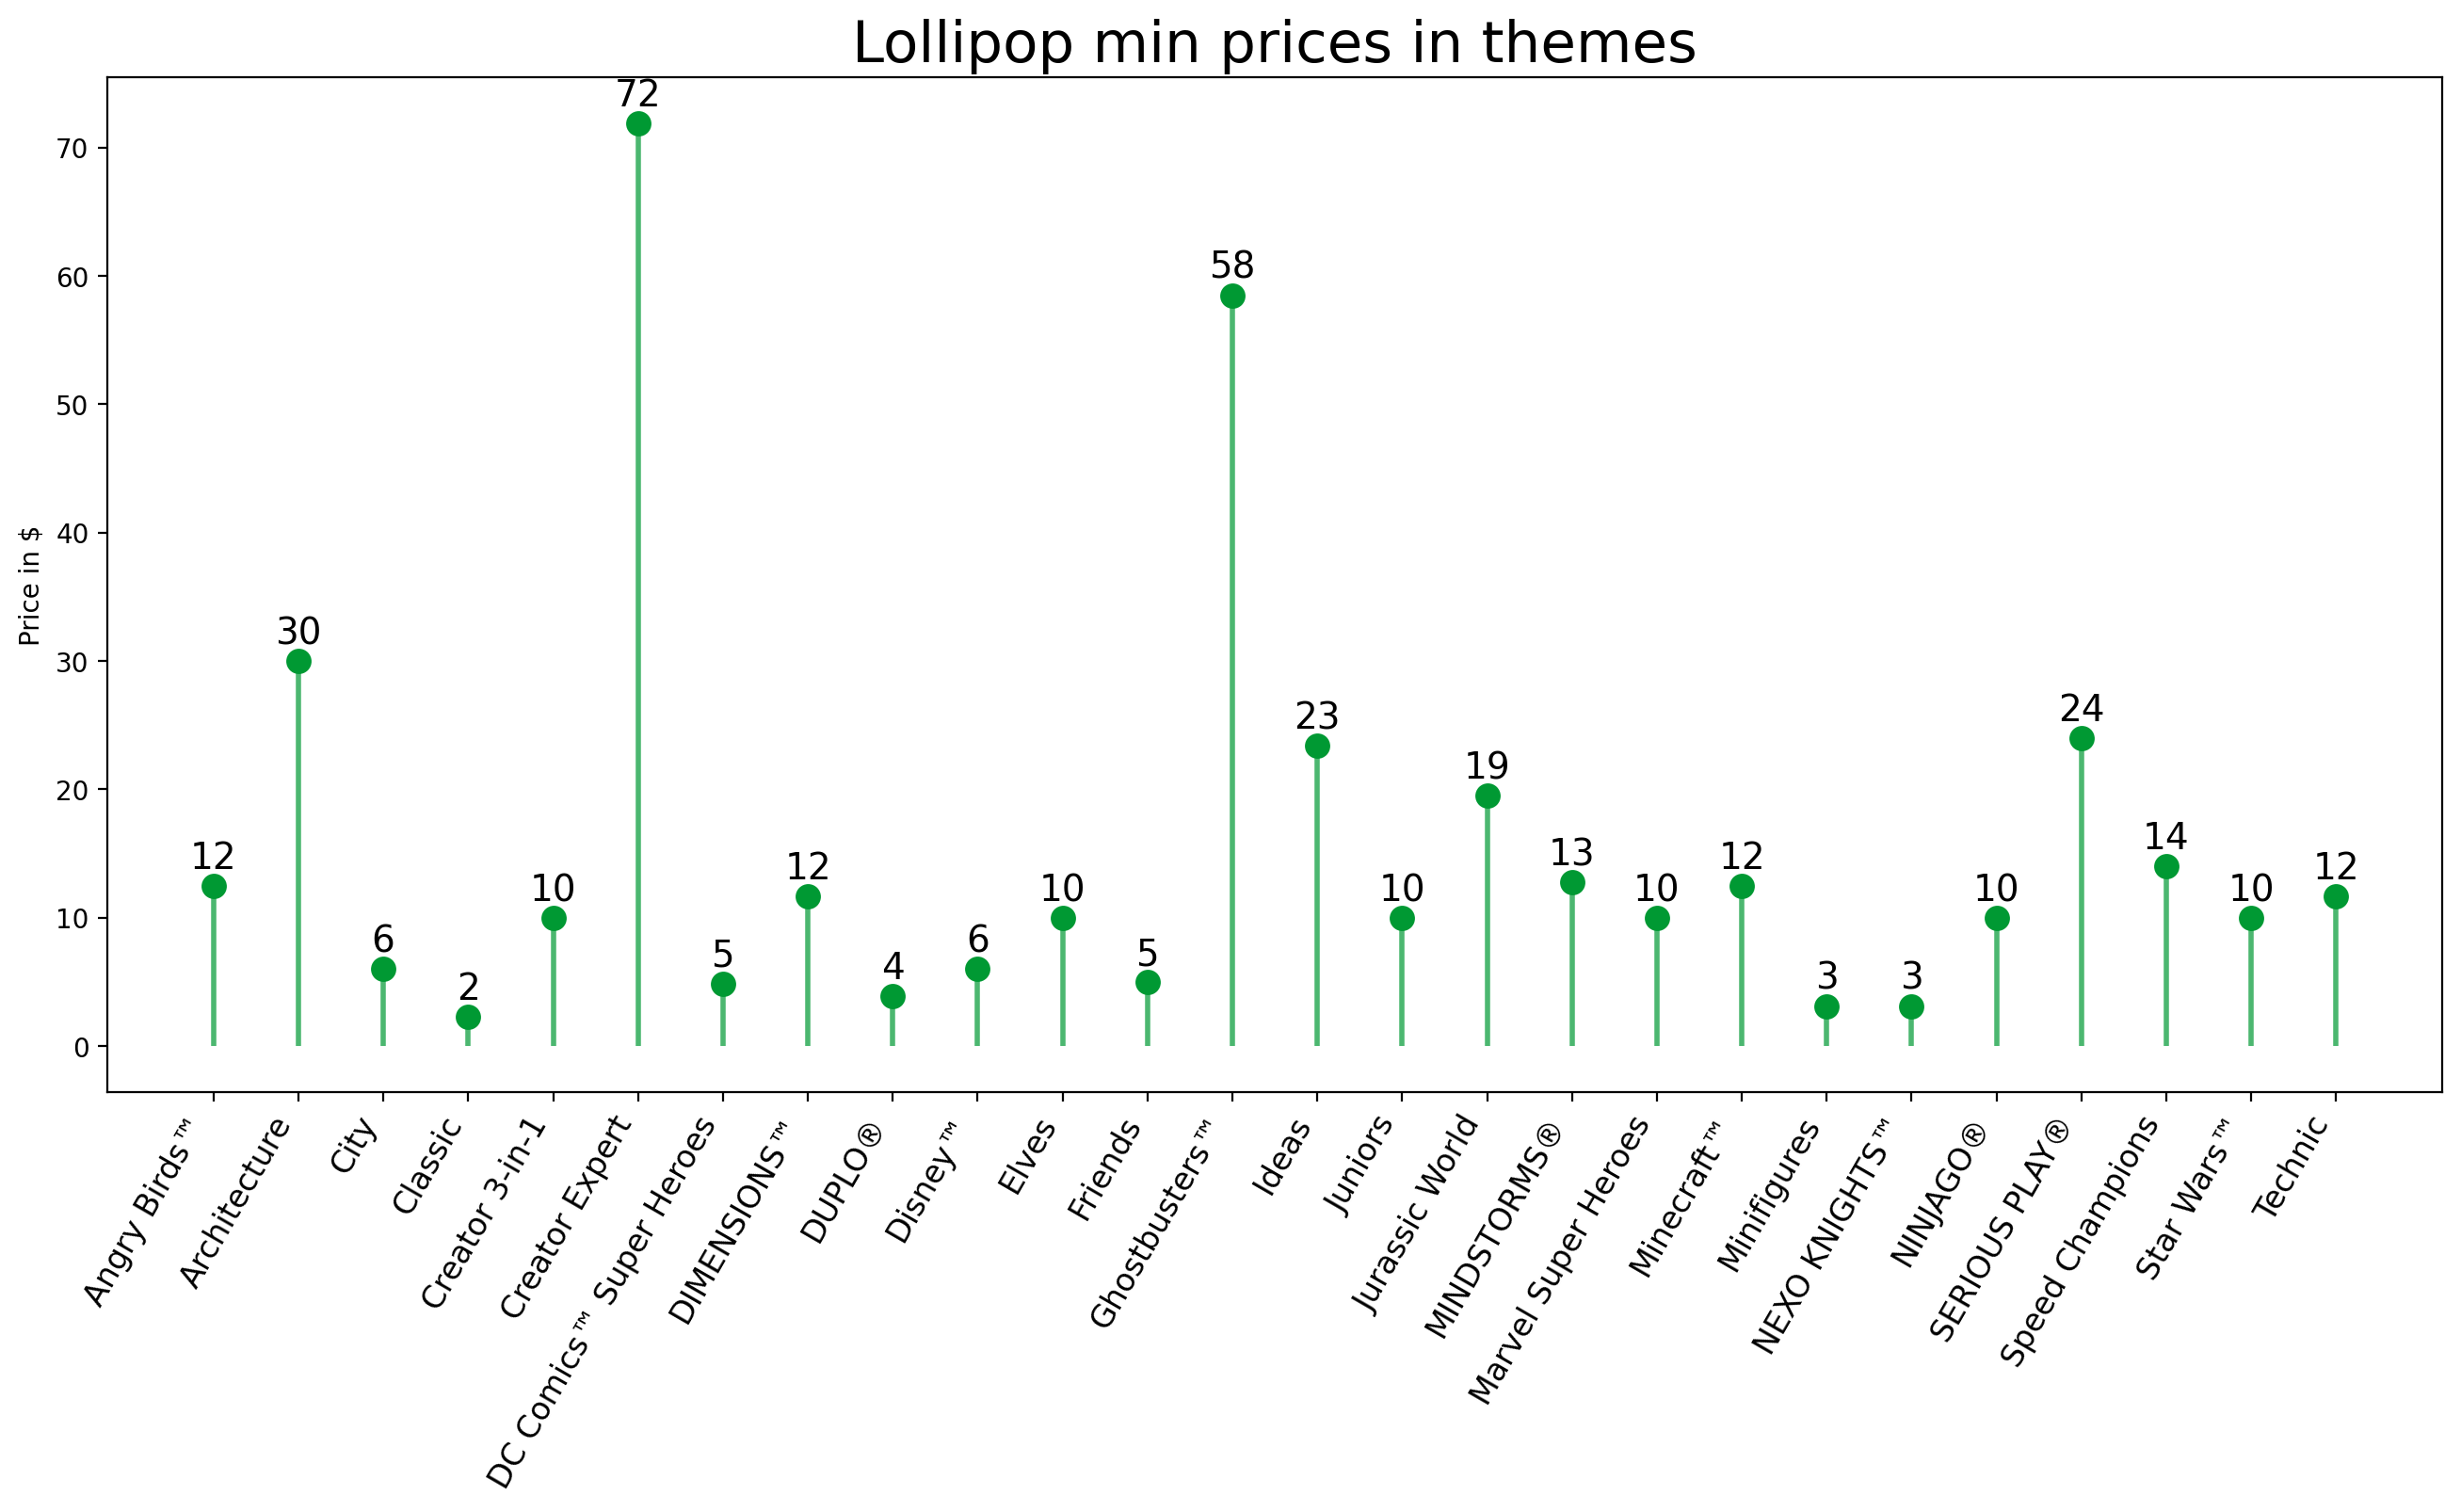

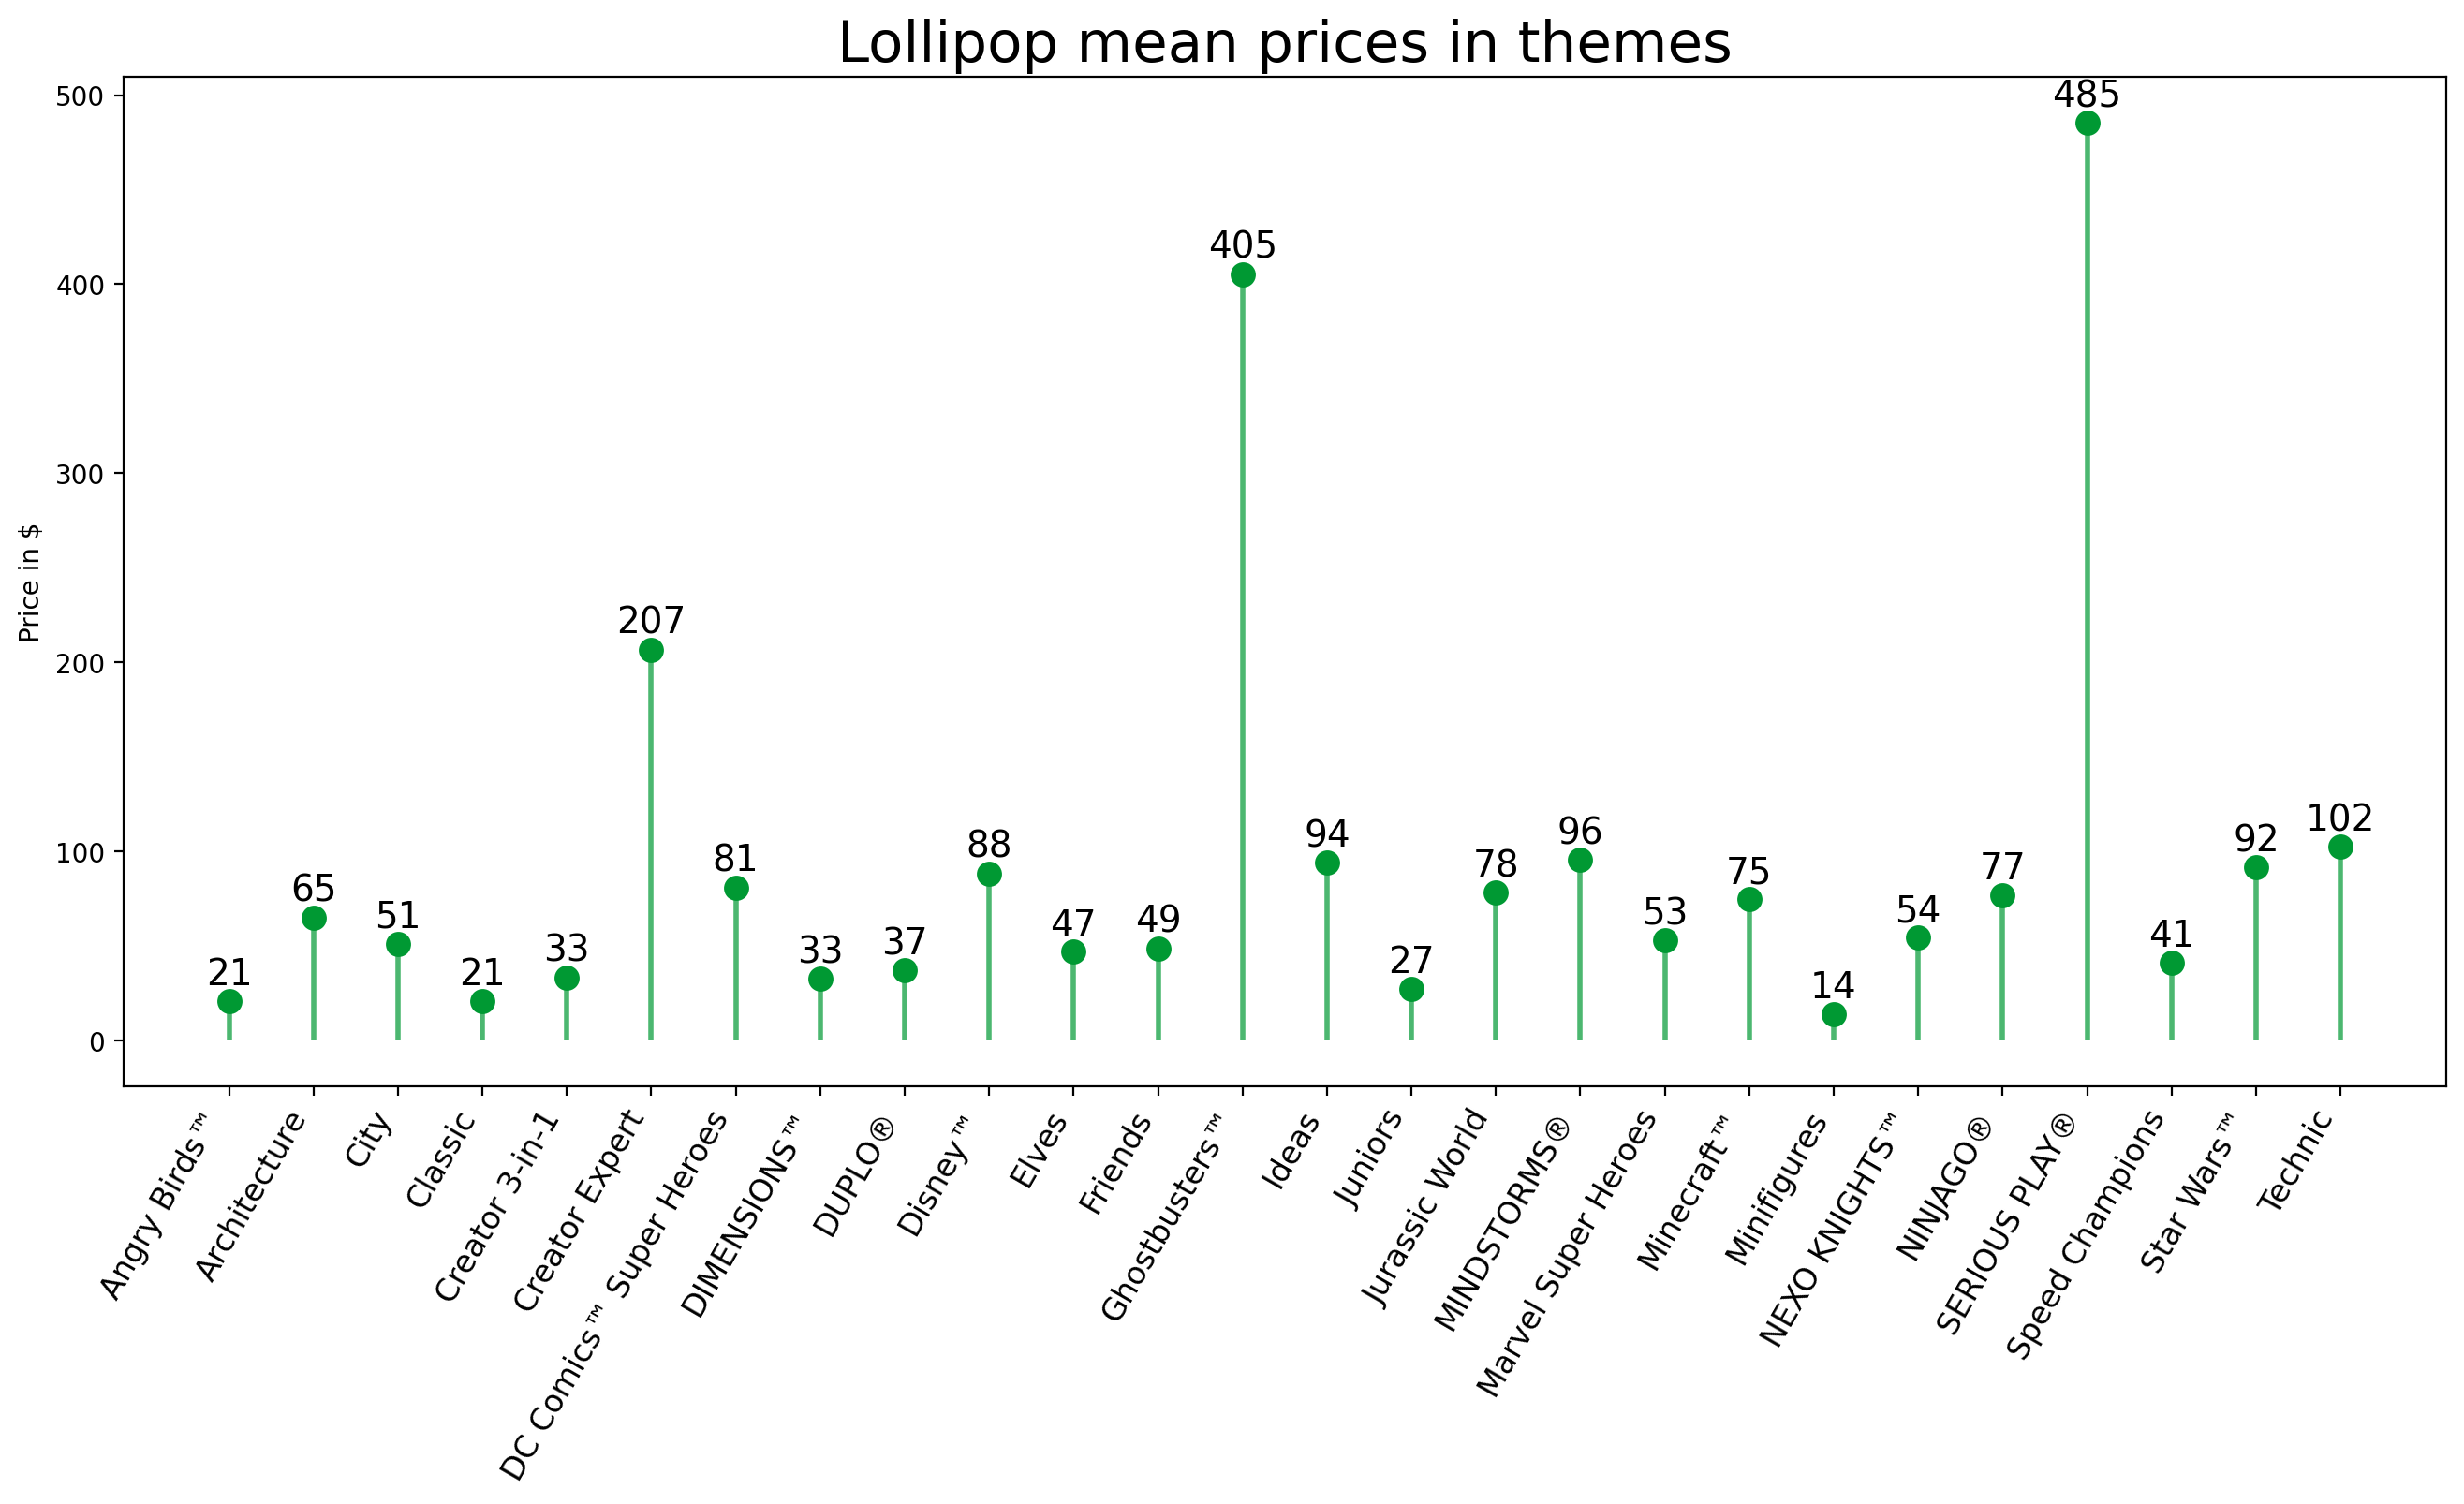

In [501]:
for m in ['max', 'min', 'mean']:
    Lol(df, 'list_price', m)

# Hypothesis:
### Sets from popular themes (such as Star Wars or DC) <br> have a higher  average price per piece than those from less popular themes.

### Calculation of the average price of a piece in different themes

In [333]:
df['price_per_piece'] = df['list_price'] / df['piece_count']
aver = df.groupby('theme_name')['price_per_piece'].mean().reset_index()
aver.columns = ['theme_name', 'average_price_per_piece']
aver.sort_values('average_price_per_piece', inplace=True) 

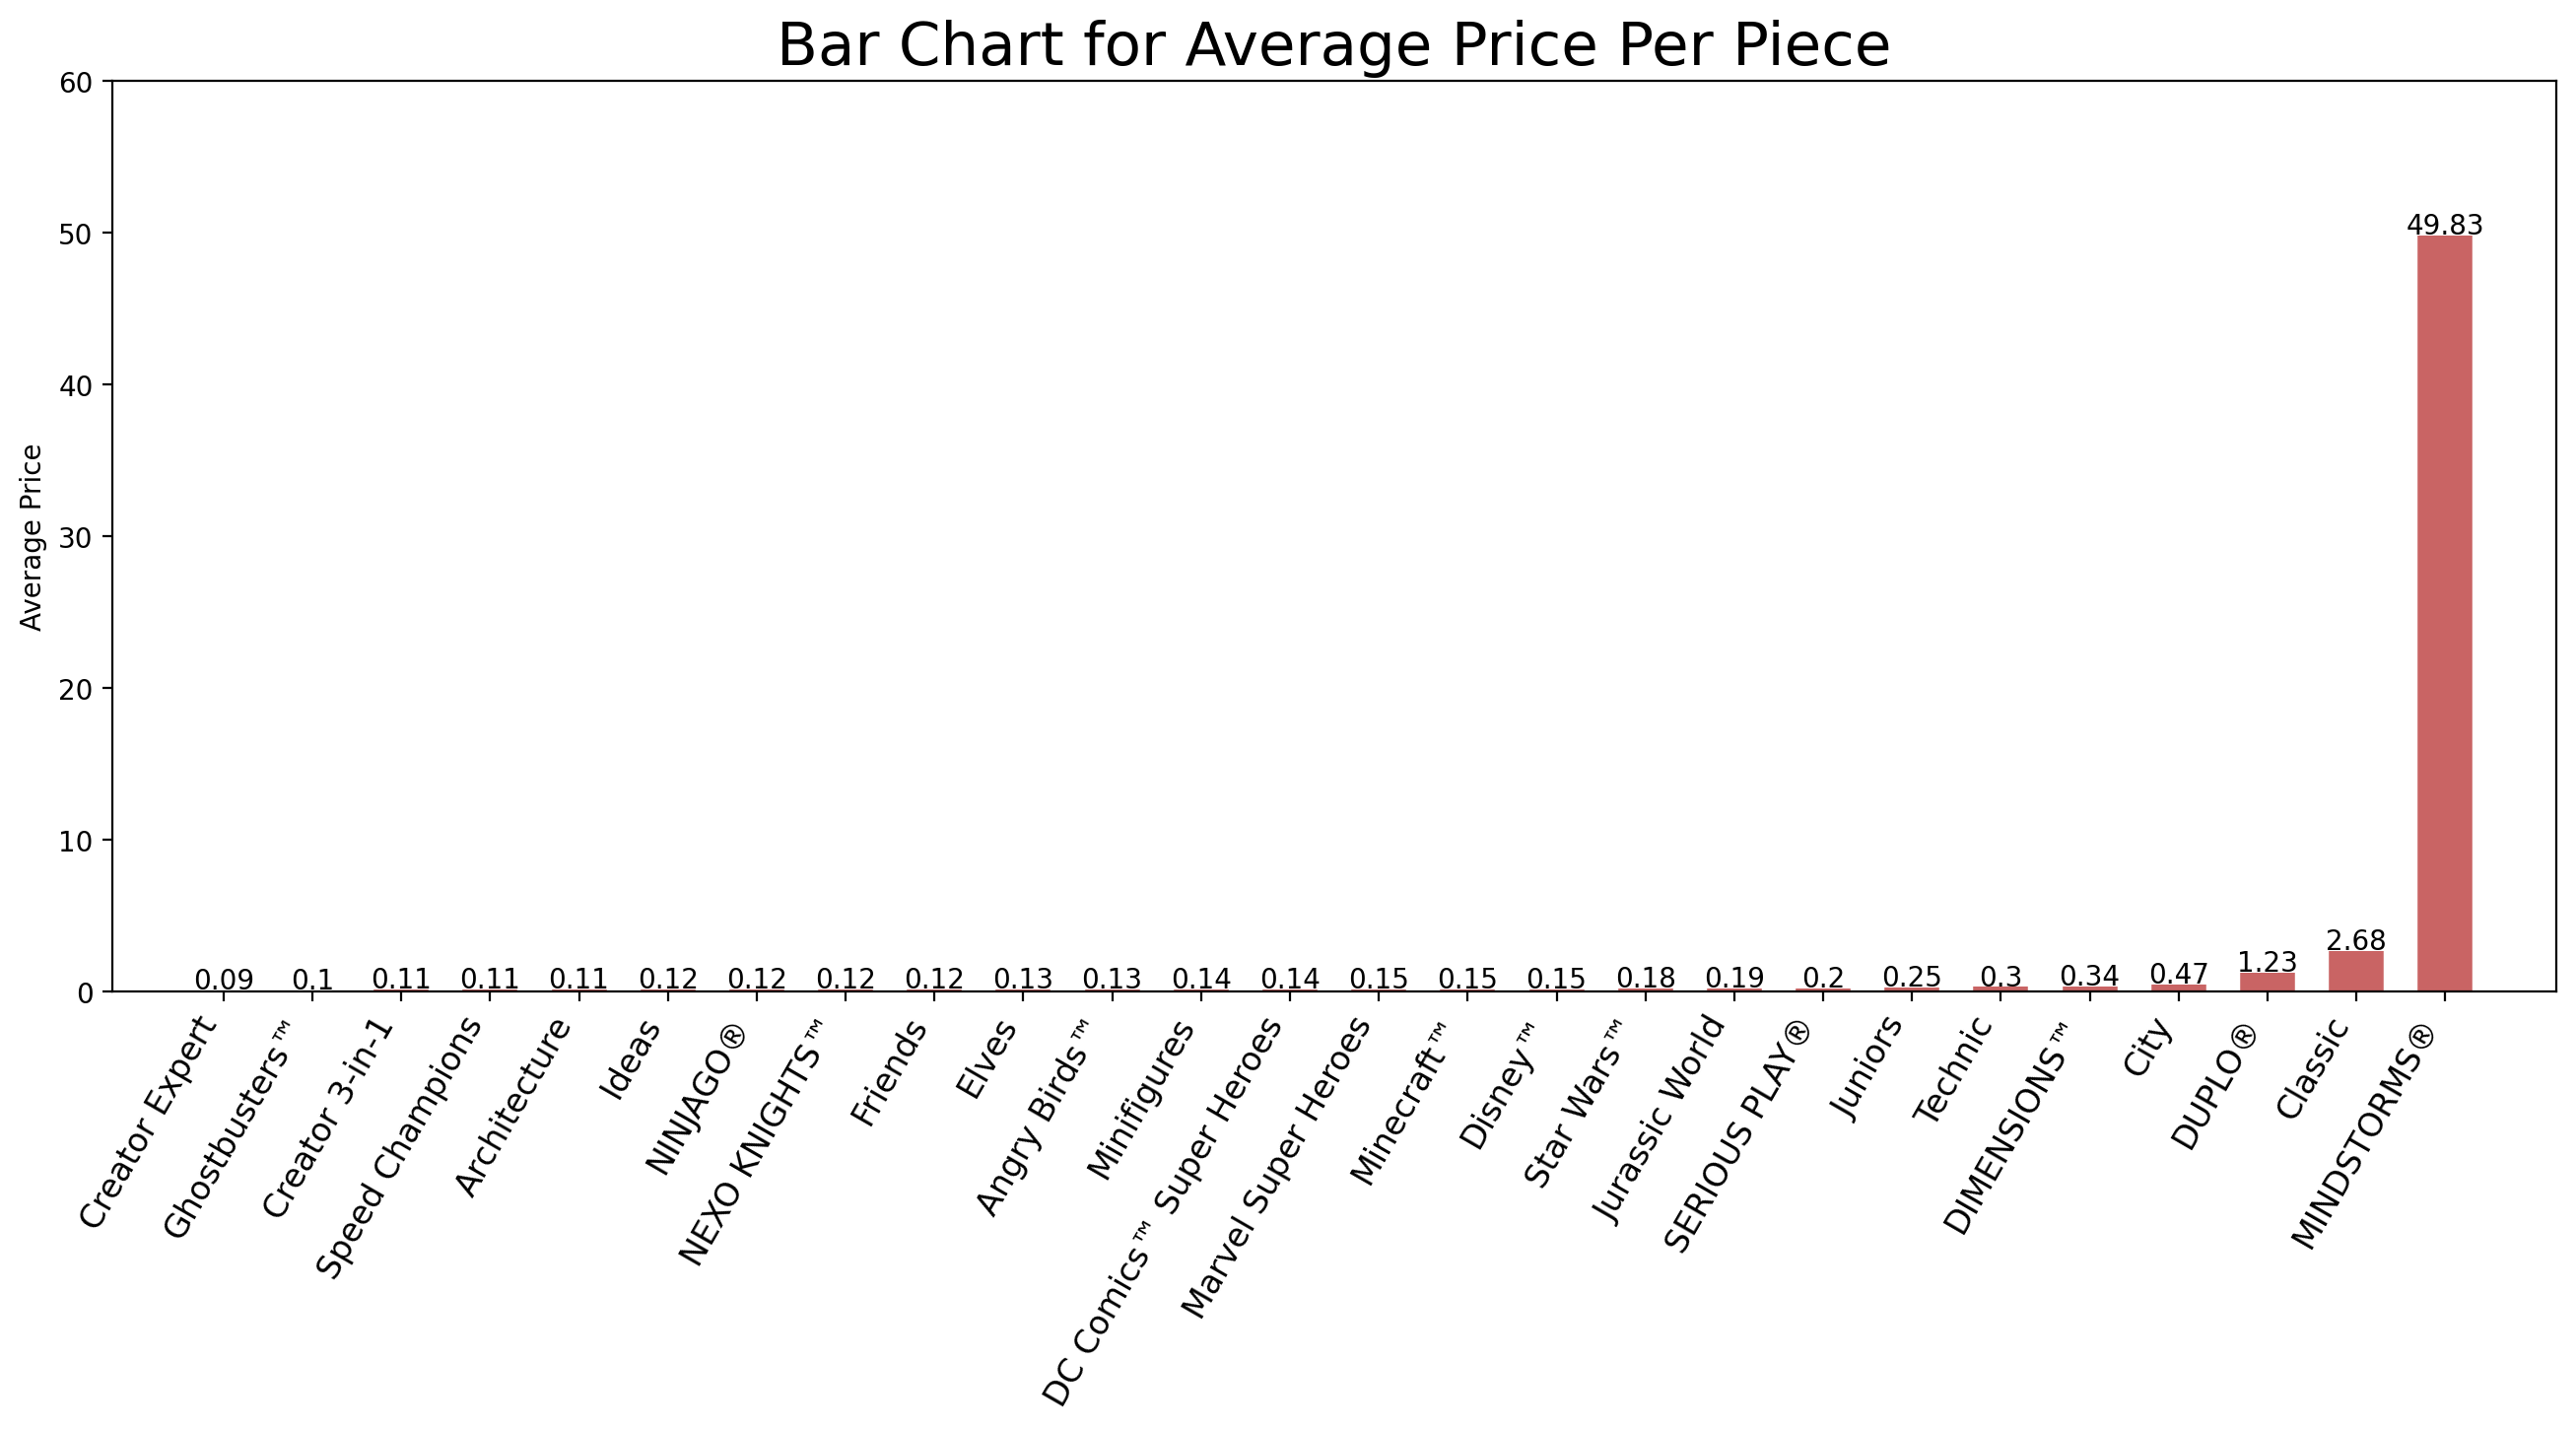

In [221]:
fig, ax = plt.subplots(figsize=(16,6), facecolor='white', dpi=200)
ax.vlines(x=aver.theme_name,
          ymin=0, ymax=aver.average_price_per_piece,
          color='firebrick', alpha=0.7, linewidth=20)

for i, ave in enumerate(aver.average_price_per_piece):
    ax.text(i, ave+0.1, round(ave, 2), horizontalalignment='center')
    
ax.set_title('Bar Chart for Average Price Per Piece', fontdict={'size':22})
ax.set(ylabel='Average Price', ylim=(0, 60))
plt.xticks(aver.theme_name, rotation=60, horizontalalignment='right', fontsize=12)

plt.show()

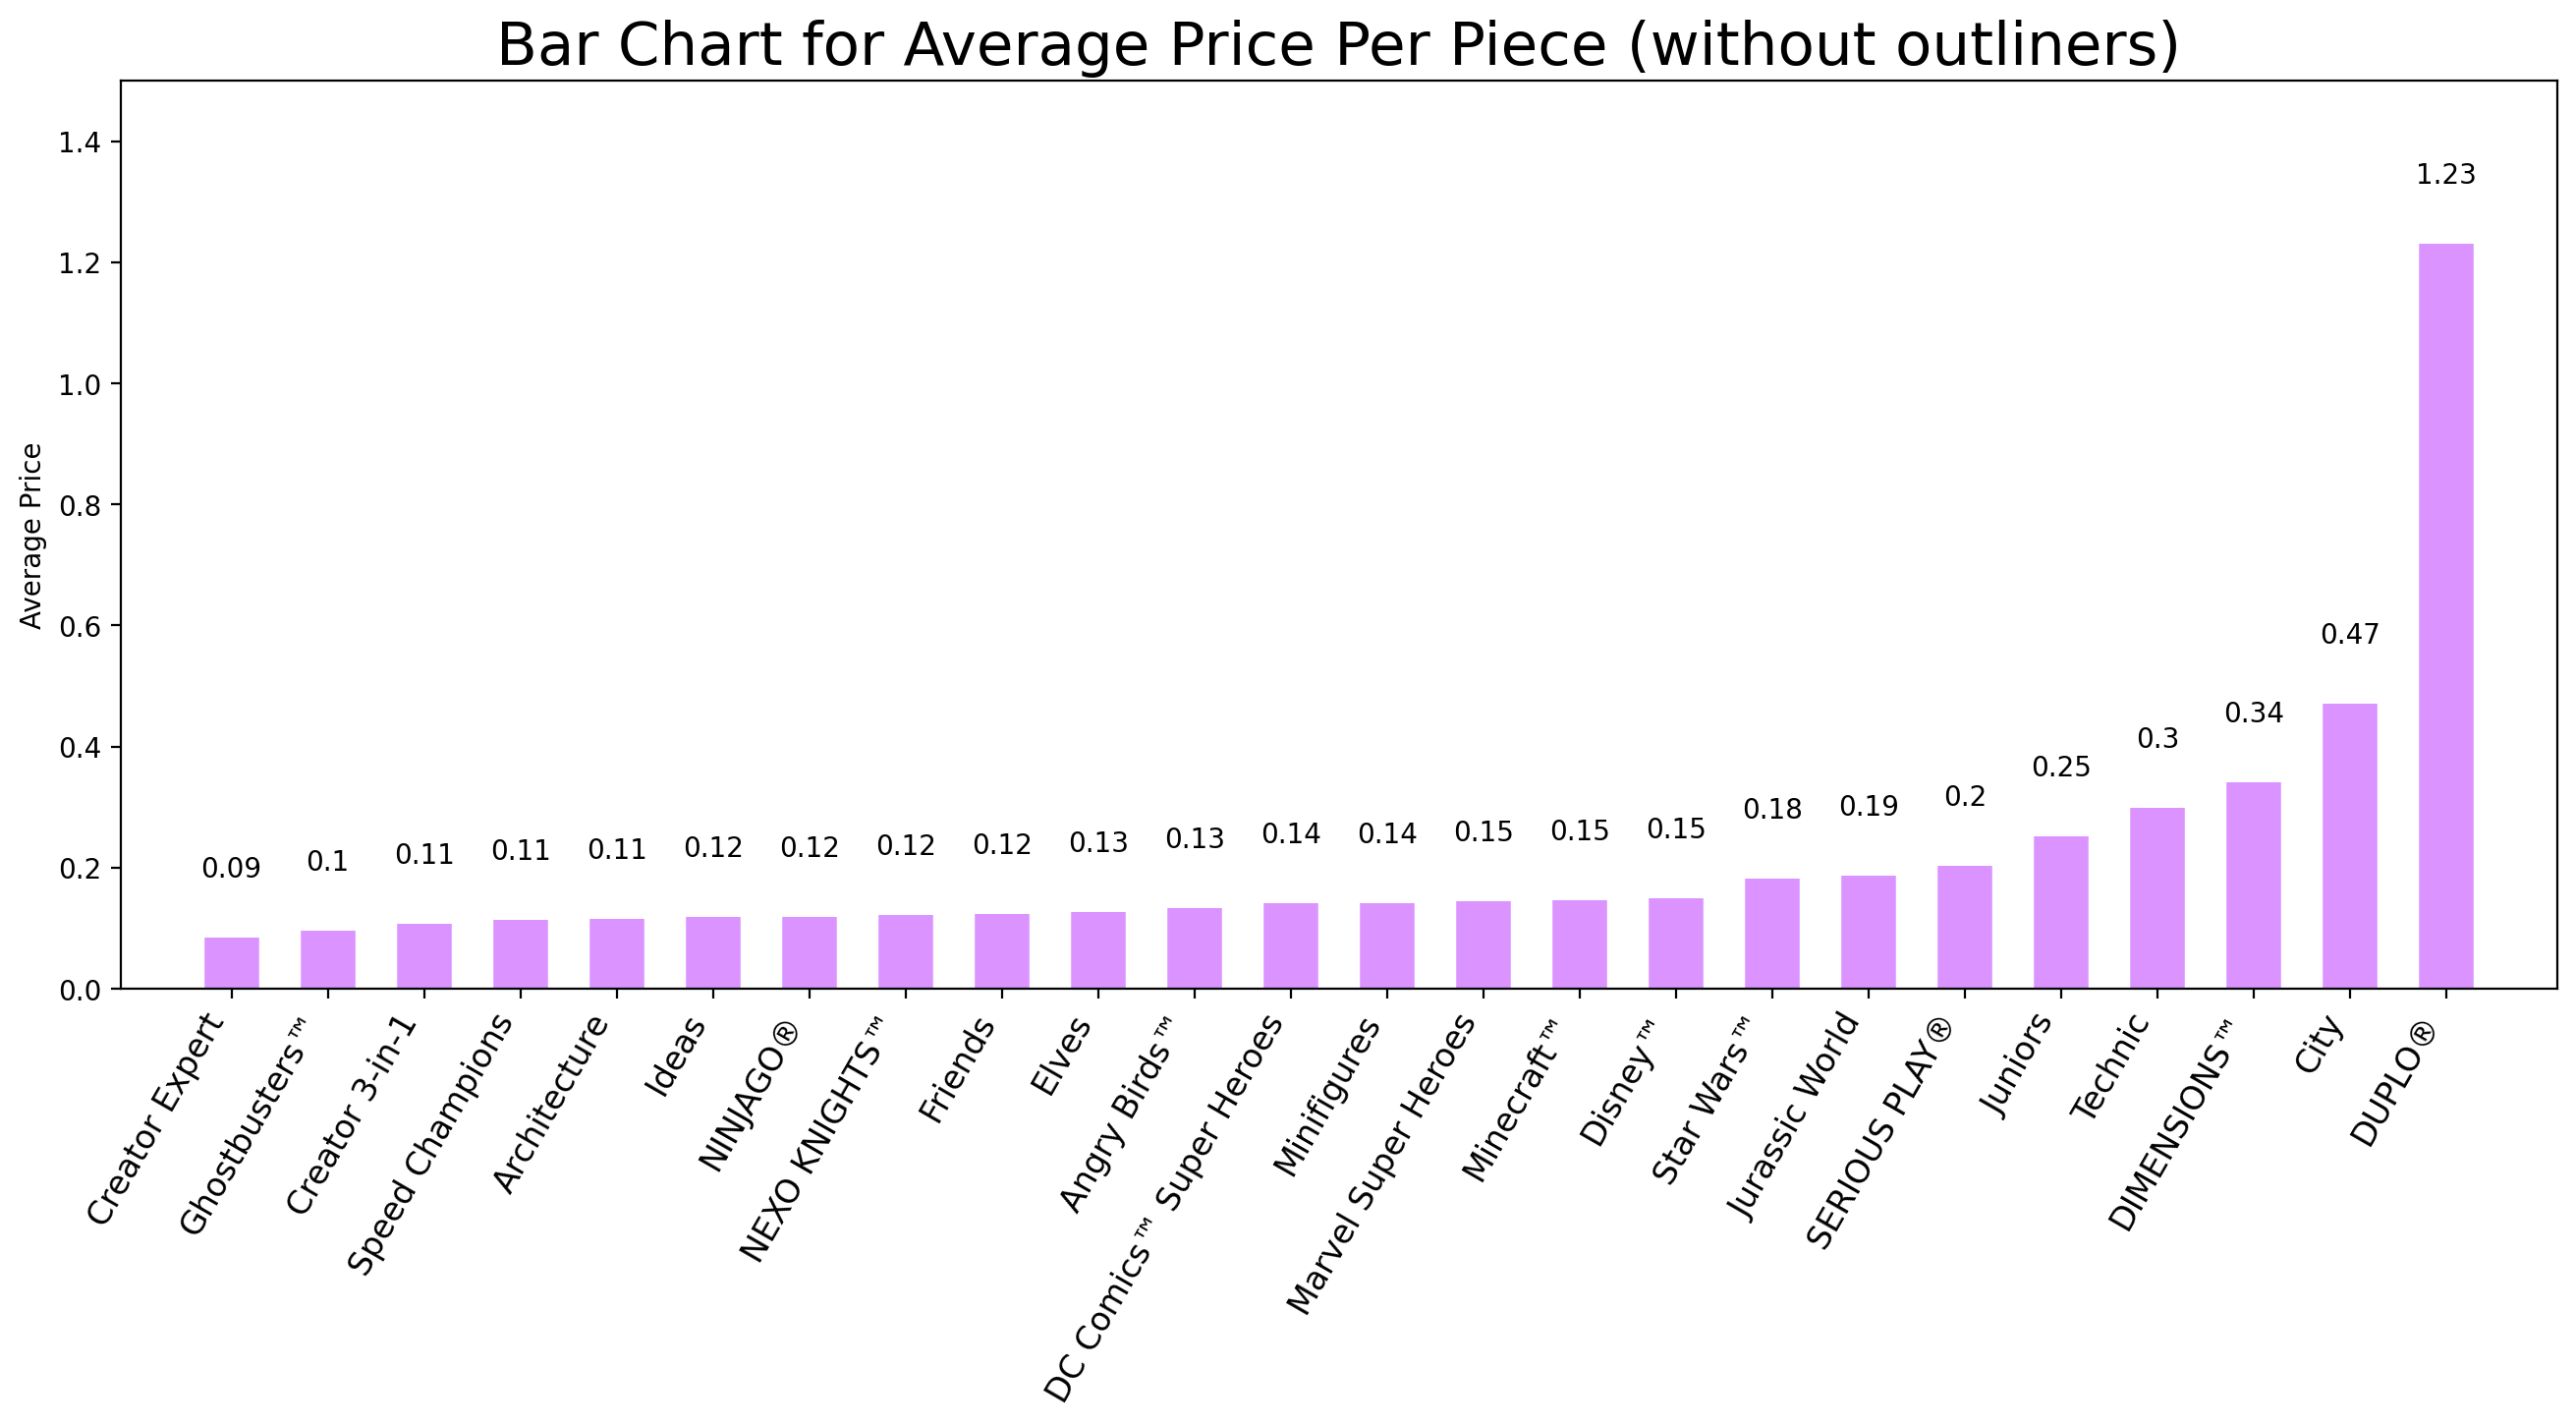

In [366]:
fig, ax = plt.subplots(figsize=(16,6), facecolor='white', dpi=200)
ax.vlines(x=aver.theme_name[:-2],
          ymin=0, ymax=aver.average_price_per_piece[:-2],
          color='#cc66ff', alpha=0.7, linewidth=20)

for i, ave in enumerate(aver.average_price_per_piece[:-2]):
    ax.text(i, ave+0.1, round(ave, 2), horizontalalignment='center')
    
ax.set_title('Bar Chart for Average Price Per Piece (without outliners)', fontdict={'size':22})
ax.set(ylabel='Average Price', ylim=(0, 1.5))
plt.xticks(aver.theme_name[:-2], rotation=60, horizontalalignment='right', fontsize=12)

plt.show()

/var/folders/_q/c23yl9bx1_9g4j_tnjxjf0hw0000gn/T/ipykernel_13664/2842289300.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x='list_price', y='piece_count',
/var/folders/_q/c23yl9bx1_9g4j_tnjxjf0hw0000gn/T/ipykernel_13664/2842289300.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x='list_price', y='piece_count',


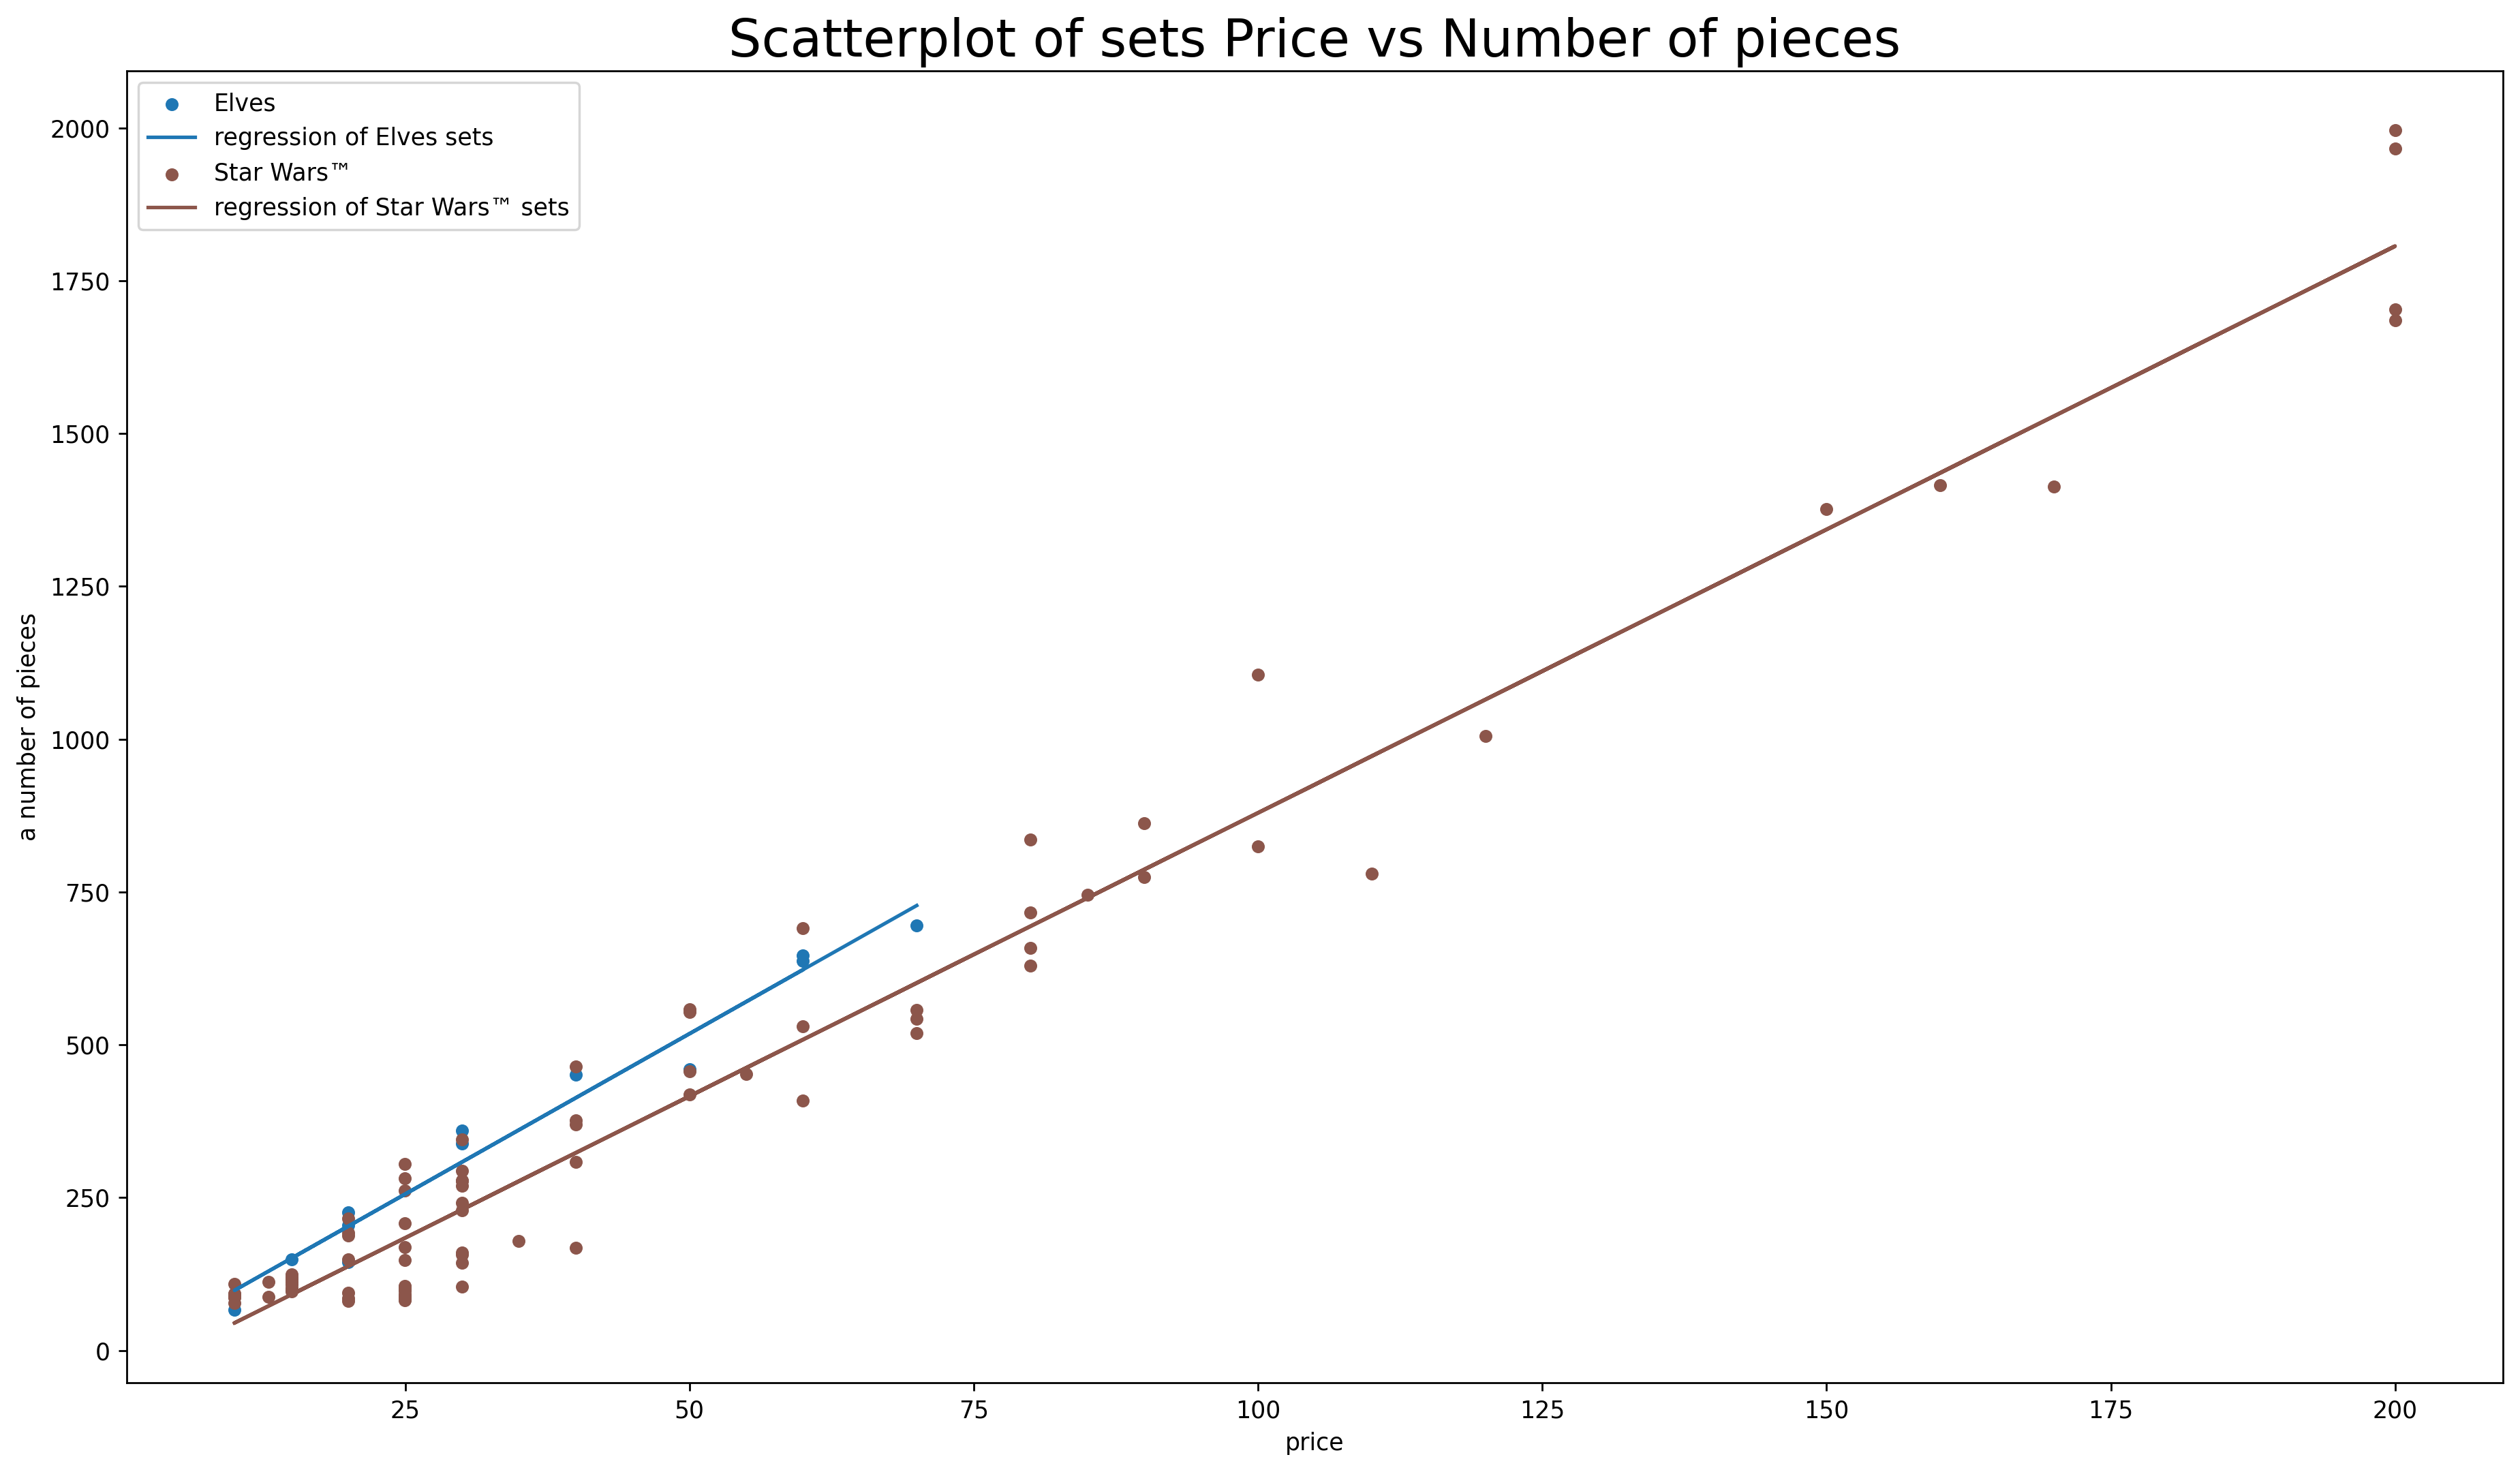

In [391]:
Price_vs_Number_of_pieces(df, ['Star Wars™', 'Elves'], 'US')

/var/folders/_q/c23yl9bx1_9g4j_tnjxjf0hw0000gn/T/ipykernel_13664/2842289300.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x='list_price', y='piece_count',
/var/folders/_q/c23yl9bx1_9g4j_tnjxjf0hw0000gn/T/ipykernel_13664/2842289300.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x='list_price', y='piece_count',


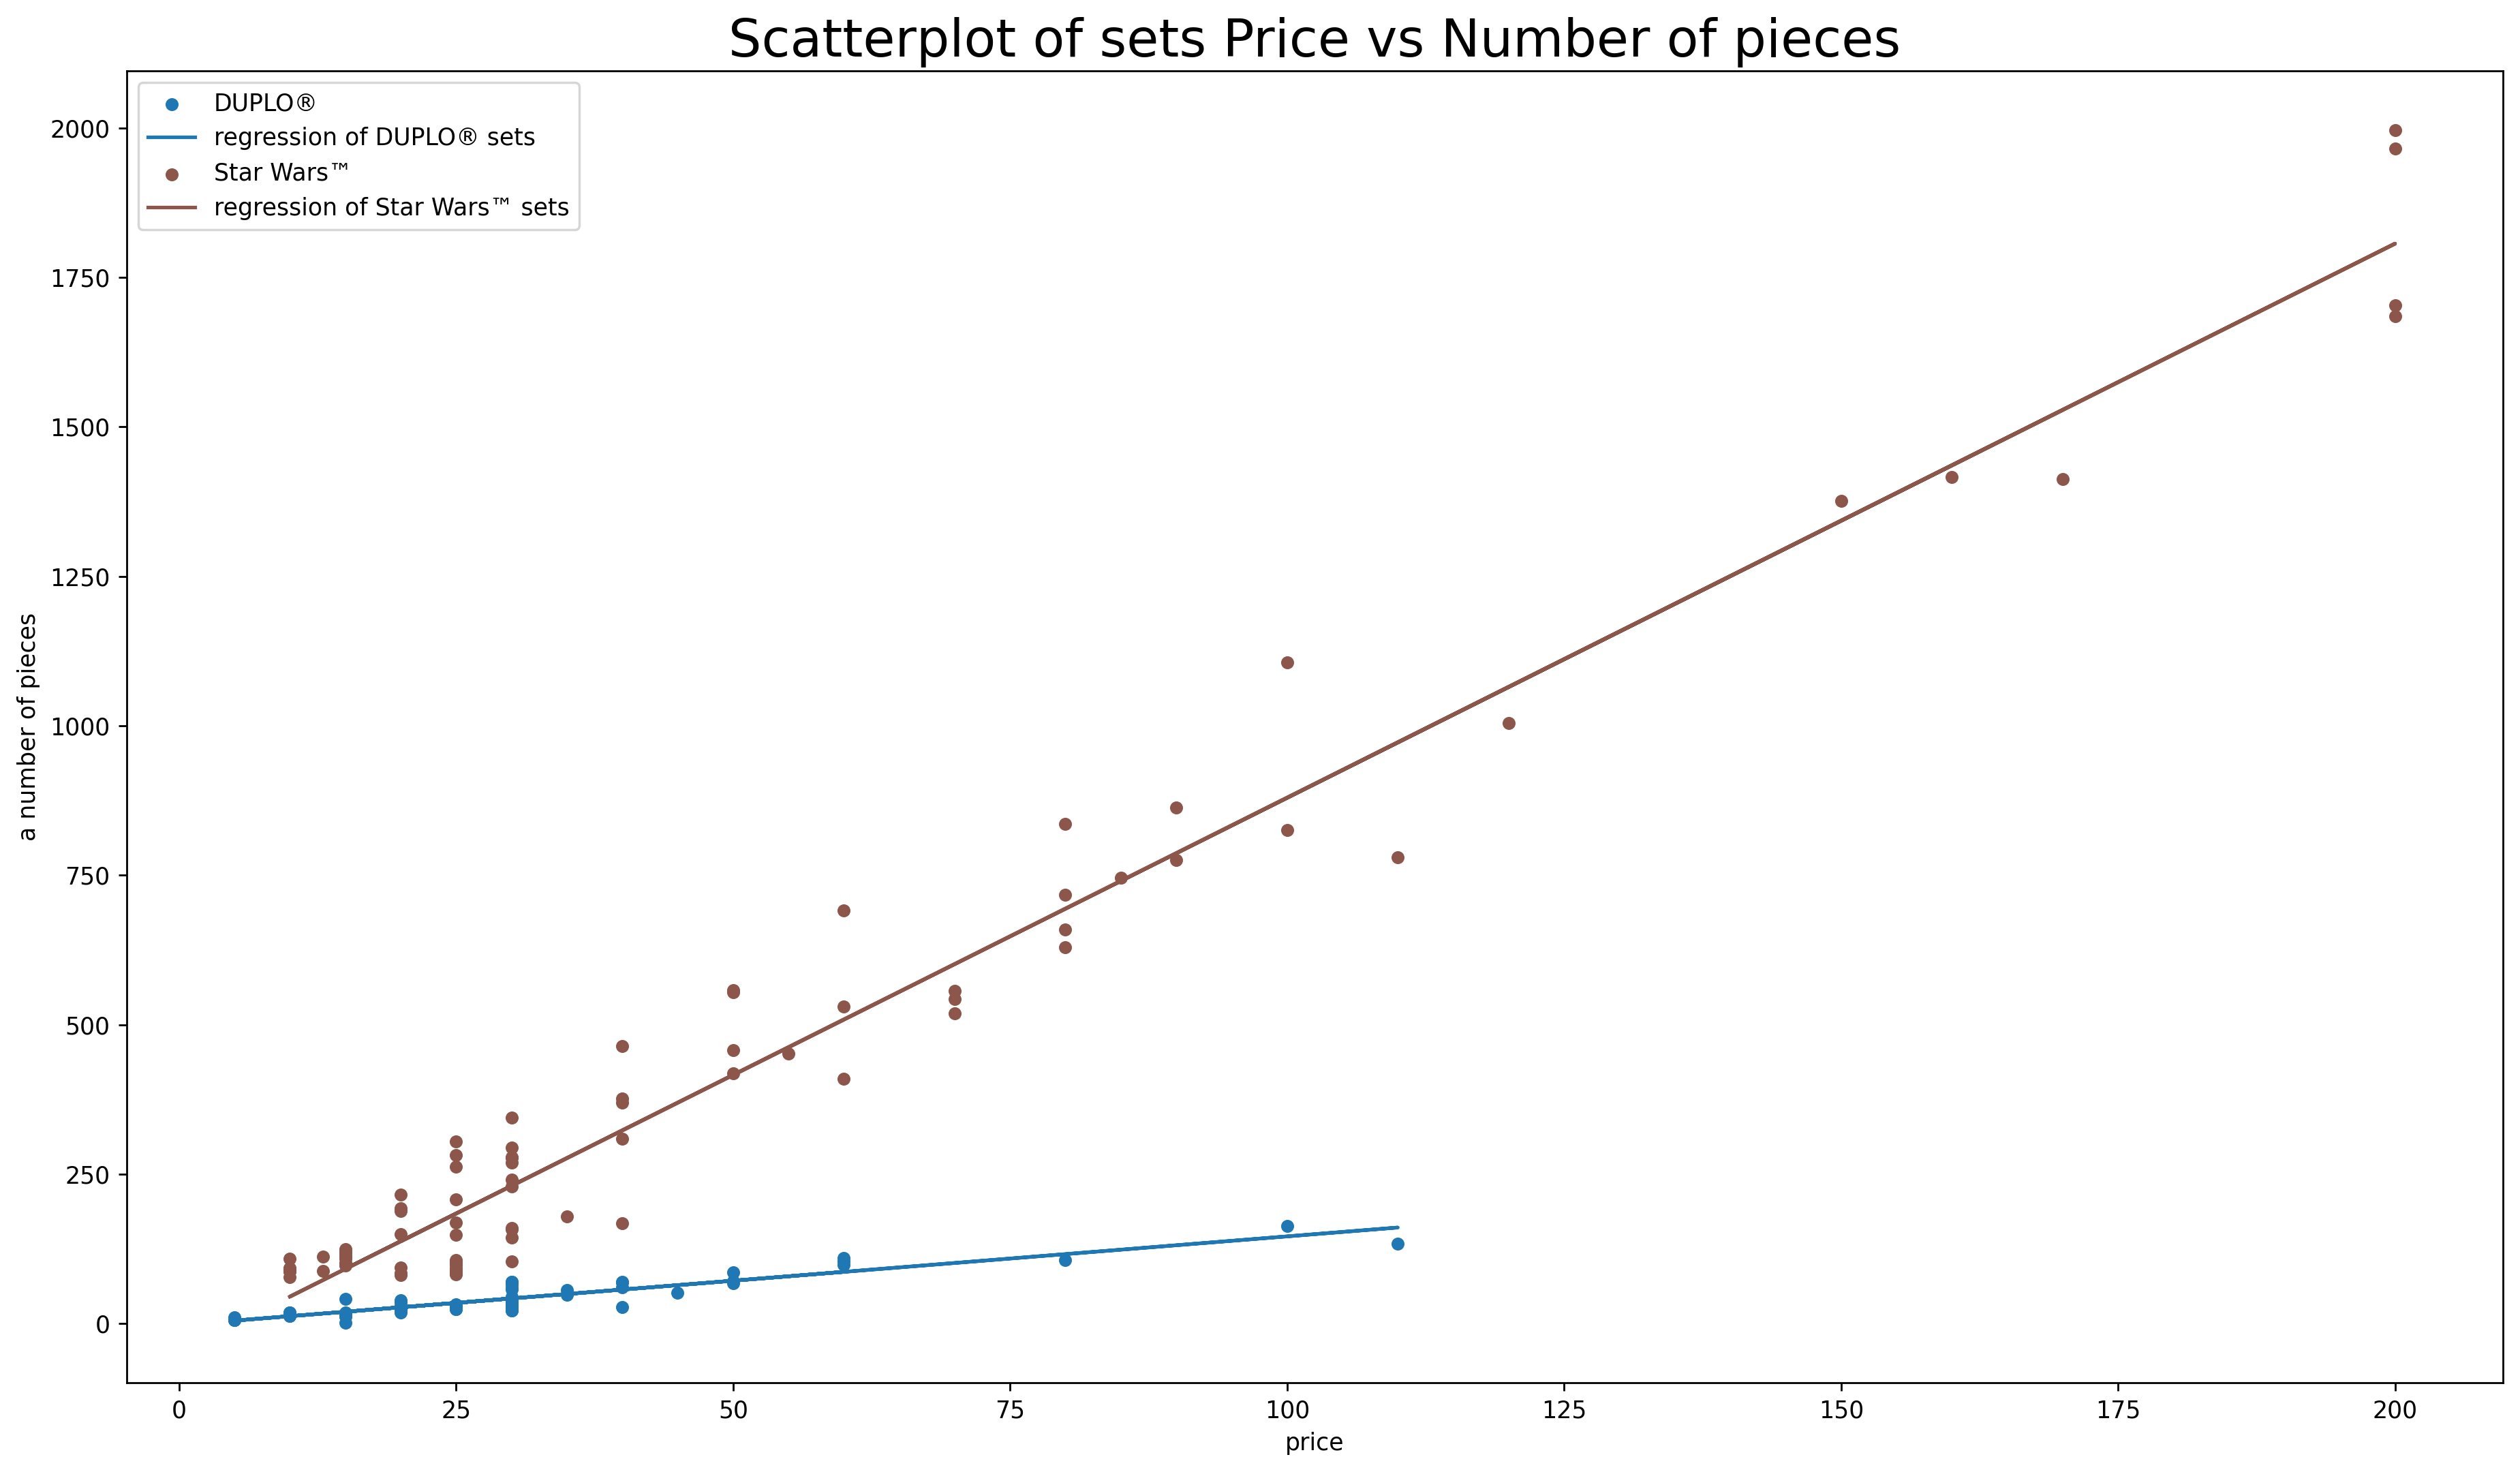

In [394]:
Price_vs_Number_of_pieces(df, ['Star Wars™', 'DUPLO®'], 'US')